<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this course!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lesson notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns


# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file
%matplotlib inline

# this line makes plots prettier on mac retina screens - if you don't have one it shouldn't do anything
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [2]:
# Loading the file with the csv module

sat_csv = "/Users/lewis/Desktop/GA/DSI25-lessons/projects/project-2/sat_scores.csv"

with open(sat_csv, mode='r') as csv_file:
    csv_reader = csv.reader(csv_file)
        
    # lists of column values, to be used as dict values
    state = []
    rate = []
    verbal = []
    math = []
    
    # skipping header/column name row
    next(csv_reader)

    # populating lists
    for line in csv_reader:
        state.append(line[0])
        rate.append(int(line[1]))
        verbal.append(int(line[2]))
        math.append(int(line[3]))

# building dict
sat_dict = {'state':state, 'rate':rate, 'verbal':verbal, 'math':math}

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [3]:
# Making a DataFrame with sat_dict
sat_dict_to_df = pd.DataFrame(sat_dict)

In [4]:
# Making a DataFrame with pd.read_csv()
sat = pd.read_csv(sat_csv)
sat.columns = [col.lower() for col in sat.columns]

In [5]:
# Compare the DataFrames using the .dtypes attribute in the DataFrame objects.
sat_dict_to_df.dtypes

state     object
rate       int64
verbal     int64
math       int64
dtype: object

In [6]:
sat.dtypes

state     object
rate       int64
verbal     int64
math       int64
dtype: object

**Q:** What is the difference between loading from file and inputting this dictionary (if any)?

**A:** sat_dict_to_df's dtypes are the same as sat's, but only because I manually set them to be. If I did not convert the string column values to floats when creating the dictionary, the columns in the DataFrame would be of type `object` (i.e. strings). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [7]:
sat.head(10)

,state,rate,verbal,math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


In [8]:
sat.state.value_counts().size

52

In [9]:
# checking what the 'All' row is
sat.loc[sat['state'] == 'All']

,state,rate,verbal,math
51,All,45,506,514


In [10]:
# checking if the 'All' row is the means of the other rows (it's not)
all_dropped = sat.loc[sat['state'] != 'All']
all_dropped.mean()

rate       37.000000
verbal    532.529412
math      531.843137
dtype: float64

In [11]:
"""
My best guess is that the all row is the national average. If correct, the ‘All’ row is a different kind of 
measurement than the other rows and It’s also effectively introducing duplicate measurements (as a single 
student could be aggregated into both a state row and the all row). This will interfere with summary statistics,
so I've decided to drop it.
"""
sat = all_dropped

**Q:** Look at the first ten rows of the DataFrame: what does our data describe?

**A:** Sat includes 52 rows. 50 rows have a unique US state codes in the state column. One row lists 'DC' (i.e. the District of Columbia) as it's state. The remaining row (dropped) has the label "All" for state, which I assume to be the national average. Given this, I assume that the other 3 columns are summary statisics for SATs in each state and D.C., with rate being participation rate (%) and verbal and math being the average score on the verbal and math components of the SATs per state (it is unclear if this is the mean or median).

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [12]:
sat_data_dictionary = {
    'state'  :"(str) The state which the scores come from, formatted as United States standard state codes.",
    'rate'   :"(int) The percentage of the state's eligible students who took the SAT test.",
    'verbal' :"(int) The state's average score on the SAT test's verbal component.",
    'math'   :"(int) The state's average score on the SAT test's math component.",
    'shape'  :sat.shape
}

sat_data_dictionary

{'state': '(str) The state which the scores come from, formatted as United States standard state codes.',
 'rate': "(int) The percentage of the state's eligible students who took the SAT test.",
 'verbal': "(int) The state's average score on the SAT test's verbal component.",
 'math': "(int) The state's average score on the SAT test's math component.",
 'shape': (51, 4)}

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

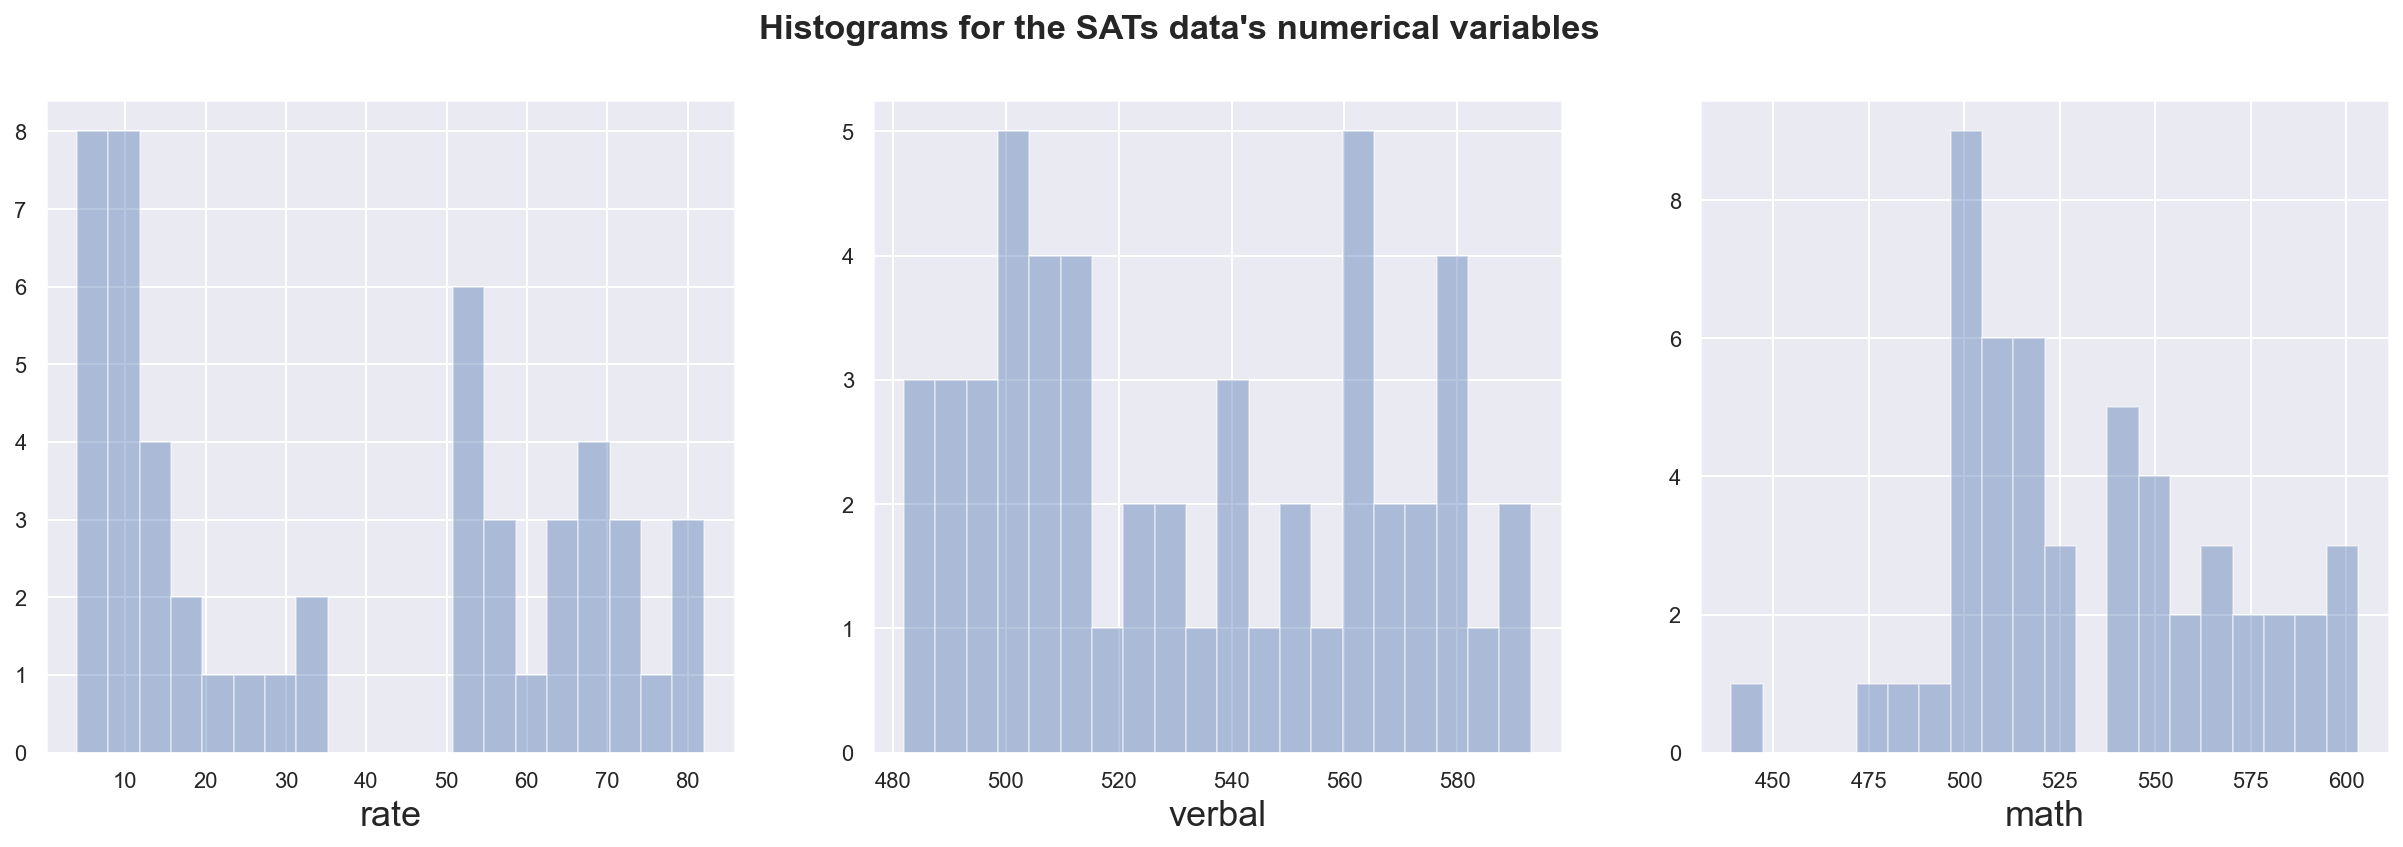

In [13]:
# setting label sizes
sns.set(rc = {'axes.labelsize' : 18 })

# generating fig, axes
fig, ax = plt.subplots(1,3, figsize=[21,6])

# setting fig title
fig.suptitle("Histograms for the SATs data's numerical variables" ,
               fontsize = 'x-large' , 
               fontweight = 'bold' );

# generating histograms
plot_num = 0
for col in sat.columns[1:]:
    sns.distplot(sat[col],ax=ax[plot_num],bins=20,kde=False)
    plot_num +=1    

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

In [14]:
# importing additional data so pairplot values may be colour coded by US state region
census = pd.read_csv("/Users/lewis/Desktop/GA/DSI25-lessons/projects/project-2/us census bureau regions and divisions.csv")

# cleaning column names
census.columns = ['state name', 'state', 'region', 'division']

# joining new data to sat
sat = sat.merge(right = census, how = 'inner', on = 'state')

# adding new columns to the sat_data_dictionary
sat_data_dictionary['state name'] = "(str) The state's full name."
sat_data_dictionary['region'] = "(str) The region where the state is located."
sat_data_dictionary['division'] = "(str) The division where the state is located."



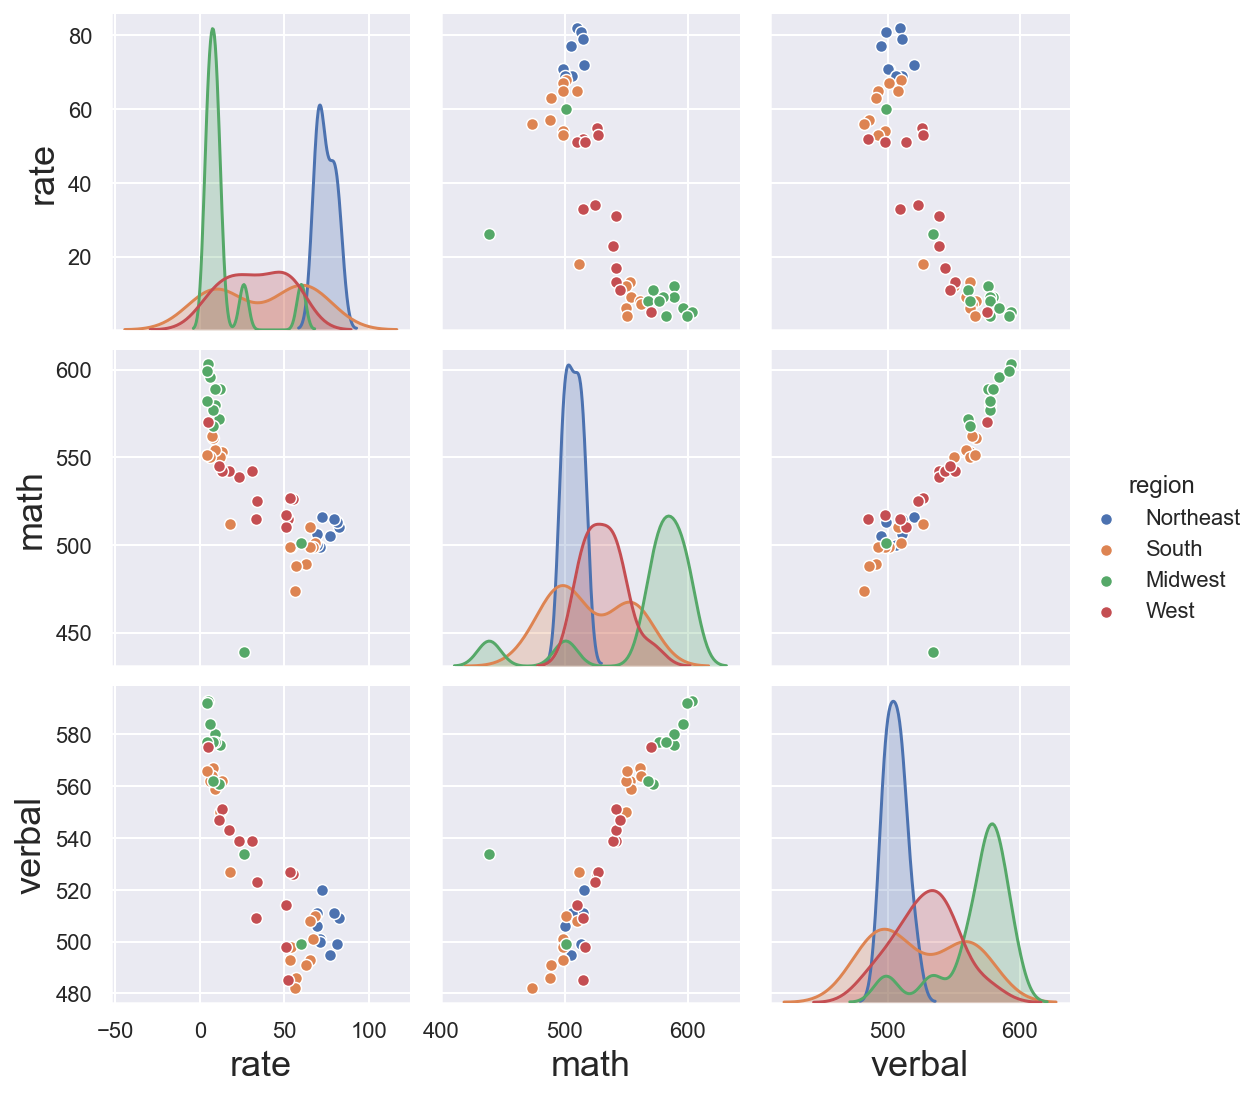

In [15]:
# Using seaborn's pairplot, show the joint distributions for each of Rate, Math, and Verbal
sns.pairplot(
    sat,
    vars = ['rate','math','verbal'],
    kind='scatter', 
    hue='region',
)

**Q:** Explain what the visualization tells you about your data.

**A:**
The pairplot shows:
* Along the diagonal: Kernel density estimates for each region, for each of the 3 variables.
    * The rate KDE shows that in the Midwest, it is typical for fewer than 20% students to sit the SATs. The distribution of rate in the Midwestern states is roughly normally distributed, however two Midwestern states are outliers, with participation rates of approx. 25-30% and  60%. In the North East, it is common for states to have a participation rate of ~70-80% (rougly normally distributed). The rate of students sitting the SATs varys more widely amongst states in both the South (<10%-70%) and the West (<10% - approx.55%). The distribution of rate in the South is roughly binomial, whereas in the West it is roughly normal.
    * The math and verbal KDEs show that the average score on the math and verbal components of the SAT's is highest in the Midwest and lowest in the Northeast. Whilst the distributions of scores for the Northeast, West and Midwest are fairly normal, the Midwest has two outliers (the scatter graphs indicate these are the two Midwestern states with higher participation rates. As with rate, the Southern state's distribution for scores on the math and verbal components are roughly binomial.
* Top centre, top left: Scatter plots, plotting rate against math and rate against verbal, respectively.
    * These plots indicate that rate is negatively correlated with math and verbal. This suggests that in states where few students particiapte (e.g. the majority of the Midwest), only the highest ability students sit the SATs. One outlier from this trend is the Midwestern state where ~25-30% of students sit the SATs, but the average math score is lower than any other state. 
    * Both plots show that the binomial distribution of the participation rate of Southern states is also reflected in their math and verbal scores. Specifically, the average math and verbal scores tend to be higher for states where fewer students participate, than for those where more do.
    * Interestingly, although Northeastern states have higher participation rates (~70%+) than high-rate Southern states (~50%+), they tend to have moderately higher average scores for math and verbal. Whilst this effect is only minor, it could be enough to suggest that, in a regession analysis, it may be more appropriate to fit the data with a 2nd degree polynomial than with a straight line.
* Middle right: Scatter plot, plotting math against verbal.
    * This plot shows that there is a strong positive correlation between a state's math and verbal scores. This is to be expected, as in general, students with a high abiliity level on one, will tend to have a high ability level on the other. Again, there is an outlier - the Midwestern state with <450 math. Given how far this state is from the general trend, it would be worth investigating whether it's value for math is correct, or the result of a data entry error.
* Middle left, bottom left, bottom centre.
    * These plots are transpositions of other plots discussed above.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

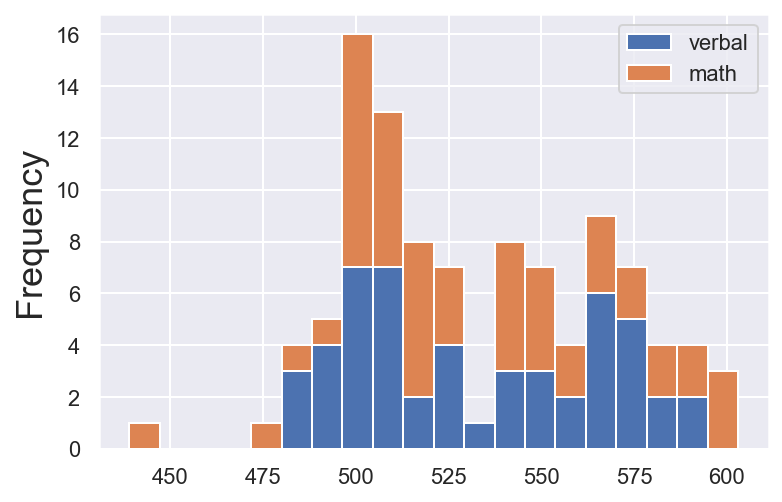

In [16]:
sat[['verbal','math']].plot(kind='hist', bins=20, stacked =True);

# TO DO: add title and axis labels

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

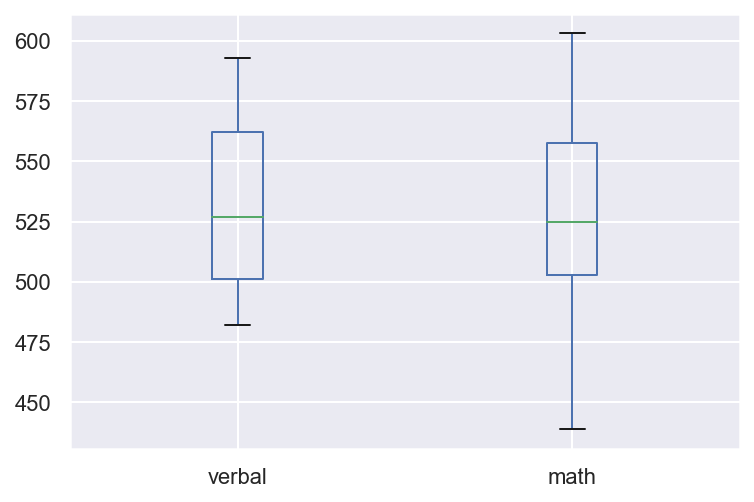

In [17]:
sat[['verbal','math']].plot(kind='box');

"""
TO DO:

figure out how to add title & axis labels

stacked_hist.xlabel="SAT component"
stacked_hist.ylabel="Average state score"
""";


**Q:** What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

**A:** Both histograms and box plots show the distribution of the dataset. The advantage of a box plot is that is also 
shows the quartiles of the dataset and any outliers (defined as values beyond 1.5 x IQR or -1.5 x IQR.

**Q:** What's wrong with plotting a box-plot of Rate on the same chart as Math and Verbal?

**A:** Rate shouldn't be plotted on the same box-plot as math and verbal, it is on a differnet scale and will 
be difficult to interpret. Specifically, values for rate have the potential to range between 0-100 (as it 
is a percentage), whereas SAT component scores (i.e. math and verbal) have the potential to range between 
200-800. The ranges of the actual values in the data set are smaller.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


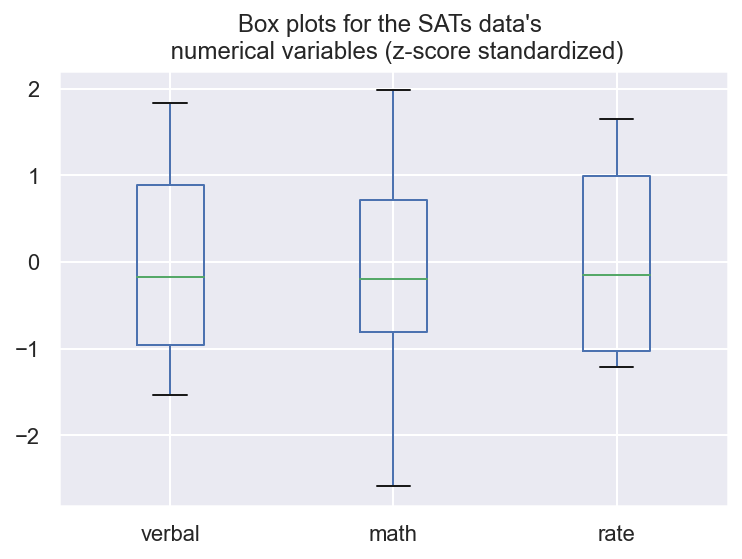

In [18]:
# z-score scaling the data
sats_zscaled = pd.DataFrame(stats.zscore(sat[['verbal','math','rate']]))

# adding column names to sats_zscaled
sats_zscaled.columns = ['verbal','math','rate']

# plotting sats_zscaled
sats_zscaled.plot(kind='box', title = "Box plots for the SATs data's \n numerical variables (z-score standardized)");

**Q:** Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart.

**A:** I have scaled the data using z-score standardization. This sets the mean of each variable to 0 and the standard deviation to 1. Although this does not show the true scale of the data, it does ensure that all variables are on the same scale, allowing for easy and intuitive comparison of their distributions, medians, quartiles and outliers (of which there are none).

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [19]:
print(f"There are {len(sat[sat.verbal > np.mean(sat.verbal)])} states with verbal scores above the mean ({round(np.mean(sat.verbal),2)}).")
sat[sat.verbal > np.mean(sat.verbal)].head()

There are 24 states with verbal scores above the mean (532.53).


,state,rate,verbal,math,state name,region,division
26,CO,31,539,542,Colorado,West,Mountain
27,OH,26,534,439,Ohio,Midwest,East North Central
28,MT,23,539,539,Montana,West,Mountain
30,ID,17,543,542,Idaho,West,Mountain
31,TN,13,562,553,Tennessee,South,East South Central


**Q:** What does this tell you about the distribution of Verbal scores?

**A:** Fewer than half the states have a verbal score above the mean. This indicates that the data are right/positively skewed (if only mildly)

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [20]:
print(f"There are {len(sat[sat.verbal > np.median(sat.verbal)])} states with verbal scores above the median ({np.median(sat.verbal)}).")
sat[sat.verbal > np.median(sat.verbal)].head()

There are 24 states with verbal scores above the median (527.0).


,state,rate,verbal,math,state name,region,division
26,CO,31,539,542,Colorado,West,Mountain
27,OH,26,534,439,Ohio,Midwest,East North Central
28,MT,23,539,539,Montana,West,Mountain
30,ID,17,543,542,Idaho,West,Mountain
31,TN,13,562,553,Tennessee,South,East South Central


**Q:** How does this compare to the list of states greater than the mean of Verbal scores? Why?

**A:** This list is identical to the previous list. This is because 24 verbal scores are above the median, 2 sit on the median and 25 are below the median.

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [21]:
sat['verbal_math_diff'] = sat['verbal'].subtract(sat['math'])
sat.head()

,state,rate,verbal,math,state name,region,division,verbal_math_diff
0,CT,82,509,510,Connecticut,Northeast,New England,-1
1,NJ,81,499,513,New Jersey,Northeast,Middle Atlantic,-14
2,MA,79,511,515,Massachusetts,Northeast,New England,-4
3,NY,77,495,505,New York,Northeast,Middle Atlantic,-10
4,NH,72,520,516,New Hampshire,Northeast,New England,4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [22]:
# 10 states with the greatest gap between Verbal and Math scores where Verbal is greater than Math
sat[sat['verbal'] > sat['math']].sort_values('verbal_math_diff', ascending = False).head(10)

,state,rate,verbal,math,state name,region,division,verbal_math_diff
27,OH,26,534,439,Ohio,Midwest,East North Central,95
29,WV,18,527,512,West Virginia,South,South Atlantic,15
50,MS,4,566,551,Mississippi,South,East South Central,15
45,AR,6,562,550,Arkansas,South,West South Central,12
31,TN,13,562,553,Tennessee,South,East South Central,9
9,VA,68,510,501,Virginia,South,South Atlantic,9
32,NM,13,551,542,New Mexico,West,Mountain,9
16,DC,56,482,474,District of Columbia,South,South Atlantic,8
41,OK,8,567,561,Oklahoma,South,West South Central,6
8,ME,69,506,500,Maine,Northeast,New England,6


In [23]:
# states with the greatest gap between Verbal and Math such that Math is greater than Verbal
sat[sat['verbal'] < sat['math']].sort_values('verbal_math_diff').head(10)

,state,rate,verbal,math,state name,region,division,verbal_math_diff
21,HI,52,485,515,Hawaii,West,Pacific,-30
23,CA,51,498,517,California,West,Pacific,-19
1,NJ,81,499,513,New Jersey,Northeast,Middle Atlantic,-14
33,IL,12,576,589,Illinois,Midwest,East North Central,-13
44,WI,6,584,596,Wisconsin,Midwest,East North Central,-12
36,MI,11,561,572,Michigan,Midwest,East North Central,-11
47,IA,5,593,603,Iowa,Midwest,West North Central,-10
3,NY,77,495,505,New York,Northeast,Middle Atlantic,-10
37,MN,9,580,589,Minnesota,Midwest,West North Central,-9
49,ND,4,592,599,North Dakota,Midwest,West North Central,-7


In [24]:
# Print the header of both variables, only showing the top 3 states in each.
sat[sat['verbal'] > sat['math']].sort_values('verbal_math_diff', ascending = False).head(3)

,state,rate,verbal,math,state name,region,division,verbal_math_diff
27,OH,26,534,439,Ohio,Midwest,East North Central,95
29,WV,18,527,512,West Virginia,South,South Atlantic,15
50,MS,4,566,551,Mississippi,South,East South Central,15


In [25]:
# Print the header of both variables, only showing the top 3 states in each.
sat[sat['verbal'] < sat['math']].sort_values('verbal_math_diff').head(3)

,state,rate,verbal,math,state name,region,division,verbal_math_diff
21,HI,52,485,515,Hawaii,West,Pacific,-30
23,CA,51,498,517,California,West,Pacific,-19
1,NJ,81,499,513,New Jersey,Northeast,Middle Atlantic,-14


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [26]:
sat.corr()

,rate,verbal,math,verbal_math_diff
rate,1.000000,-0.888121,-0.773419,-0.098671
verbal,-0.888121,1.000000,0.899909,0.044527
math,-0.773419,0.899909,1.000000,-0.395574
verbal_math_diff,-0.098671,0.044527,-0.395574,1.000000


**Q:** What does the correlation matrix tell you?

**A:** 

The correlation matrix shows: 
* A strong negative correlation between rate and verbal, and between rate and math. This indicates that states with high participation rates tend to have lower verbal and math scores.
* Rate has a negilibly small negative correlation with verbal_math_diff. This tells us there is likely no relationship between rate and verbal_math_diff.
* There is a strong positive correlation between varbal and math. This indicates that states with high verbal scores typically tend to have high math scores (and vice versa).
* A negilibly small positive correlation between verbal and verbal_math_diff. This tells us there is likely no relationship between verbal and verbal_math_diff.
* a moderate negative correlation between math and verbal_math_diff. This tells us that as a state's math score increases, so does it's tendancy to perform better on math than on verbal. However, this effect is smaller than the correlation between math and verbal.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [27]:
sat.describe()

,rate,verbal,math,verbal_math_diff
count,51.000000,51.000000,51.000000,51.000000
mean,37.000000,532.529412,531.843137,0.686275
std,27.550681,33.360667,36.287393,15.839811
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,503.000000,-6.000000
50%,33.000000,527.000000,525.000000,0.000000
75%,64.000000,562.000000,557.500000,4.500000
max,82.000000,593.000000,603.000000,95.000000


**Q:** Write up what each of the rows returned by the function indicate.

**A:**
* count - the count for each column. This shows that there are 51 values in the dataset and that none of the columns have missing values. 
* mean - the mean for each column. The similar values for verbal and math and very small value for verbal_math_diff indicates that the mean verbal and math scores are similar.
* std - the standard deviation for each column. The std for rate is 27. The std for verbal and math are 33 and 36, respectively, indicating the state's math scores are more widely distributed thatn their verbal scores. The std for verbal_math_diff is 15.
* min - the minimum value for each column. Minimum rate is 4. Minimum verbal and math scores are 482 and 439 respectively (this large gap probabaly partially accounts for math's larger std). The minimum verbal_math_diff is -30.
* 25% - the 1st quartile/25% percentile for each column. This shows threshold for each variable which 75% of the values are above.
* 50% - the median/2nd quartile/50% percentile for each column. For each variable, this shows the middle value and the threshold which 50% of the values are above.
* 75% - the 3rd quartile/75% percentile for each column. For each variable, this shows the threshold which 25% of the values are above.
* max - the maximum value recorded for each column. Earlier, I speculated that Ohio's math score may be a result of a data entry error. The max verbal_math_diff value (which is Ohio's) further highlights the irregularity of this value as it is well beyond 3 stds of the mean (athough Ohio's math value itself is just within 3 stds of the math mean). 

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [28]:
sat.cov()

,rate,verbal,math,verbal_math_diff
rate,759.04,-816.280000,-773.220000,-43.060000
verbal,-816.28,1112.934118,1089.404706,23.529412
math,-773.22,1089.404706,1316.774902,-227.370196
verbal_math_diff,-43.06,23.529412,-227.370196,250.899608


**Q:** What is the process to convert the covariance into the correlation?

**A:**

**Q:** Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

**A:** The values in the covariance matrix tell us whether the values being compared are negatively or positively associated, but not by how much. Each value in the covariance matrix is on a different scale, making them extremely difficult to compare. The values in the correlation matrix are scaled to between -1 and 1. This makes it easier to understand the nature of the relationship between the two values. It also makes it possible to compare between correlations.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1 Load the data using pandas. 

Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [29]:
drugs = "/Users/lewis/Desktop/GA/DSI25-lessons/projects/project-2/drug-use-by-age.csv"

drugs = pd.read_csv(drugs)

In [30]:
# replacing - for _ in column names
col_names = drugs.columns
col_names_cleaned = []
for col in col_names:
    col_names_cleaned.append(col.replace('-','_'))
drugs.columns = col_names_cleaned

In [31]:
drugs.dtypes

age                         object
n                            int64
alcohol_use                float64
alcohol_frequency          float64
marijuana_use              float64
marijuana_frequency        float64
cocaine_use                float64
cocaine_frequency           object
crack_use                  float64
crack_frequency             object
heroin_use                 float64
heroin_frequency            object
hallucinogen_use           float64
hallucinogen_frequency     float64
inhalant_use               float64
inhalant_frequency          object
pain_releiver_use          float64
pain_releiver_frequency    float64
oxycontin_use              float64
oxycontin_frequency         object
tranquilizer_use           float64
tranquilizer_frequency     float64
stimulant_use              float64
stimulant_frequency        float64
meth_use                   float64
meth_frequency              object
sedative_use               float64
sedative_frequency         float64
dtype: object

Several columns are encoded as string/object type, which should be floats. Specifically, the age column is encoded as a string/object type as it has values meant to express a range (e.g. 22-23). I will replace these ranges with the range's median age. The other rows encoded as string/object type include missing values represented by a hyphen. I will replace these with NaNs so that the columns can be cast to floats.

In [32]:
# cleaning age
age_col = drugs.age
cur_col = 10
for age in list(age_col[10:16]):
    age_col[cur_col] = (np.median([int(age[:2]),int(age[-2:])]))
    cur_col +=1
age_col[16] = 65
drugs.age = age_col

<ipython-input-32-7814500cc003>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_col[cur_col] = (np.median([int(age[:2]),int(age[-2:])]))
<ipython-input-32-7814500cc003>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_col[16] = 65


In [33]:
# replacing hyphens with NaNs 
drugs.replace('-',np.nan,inplace=True)
drugs.isna().sum()

age                        0
n                          0
alcohol_use                0
alcohol_frequency          0
marijuana_use              0
marijuana_frequency        0
cocaine_use                0
cocaine_frequency          1
crack_use                  0
crack_frequency            3
heroin_use                 0
heroin_frequency           1
hallucinogen_use           0
hallucinogen_frequency     0
inhalant_use               0
inhalant_frequency         1
pain_releiver_use          0
pain_releiver_frequency    0
oxycontin_use              0
oxycontin_frequency        1
tranquilizer_use           0
tranquilizer_frequency     0
stimulant_use              0
stimulant_frequency        0
meth_use                   0
meth_frequency             2
sedative_use               0
sedative_frequency         0
dtype: int64

In [34]:
# updating dtypes
drugs = drugs.astype({'age':float,
                      "cocaine_frequency":float,
                      "crack_frequency":float,
                      "heroin_frequency":float,
                      "inhalant_frequency":float,
                      "oxycontin_frequency":float,
                      "meth_frequency":float
                     })

In [35]:
# handling missing values
drugs = drugs.interpolate() # interpolating where possible
drugs = drugs.fillna(method='bfill') # backfilling where not (i.e. 1st row)
drugs

,age,n,alcohol_use,alcohol_frequency,marijuana_use,marijuana_frequency,cocaine_use,cocaine_frequency,crack_use,crack_frequency,...,oxycontin_use,oxycontin_frequency,tranquilizer_use,tranquilizer_frequency,stimulant_use,stimulant_frequency,meth_use,meth_frequency,sedative_use,sedative_frequency
0,12.0,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,3.00,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,5.0,0.2,13.0
1,13.0,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.00,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14.0,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,6.25,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15.0,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.50,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16.0,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.00,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17.0,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.00,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18.0,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.00,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19.0,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.00,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20.0,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.00,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21.0,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.00,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

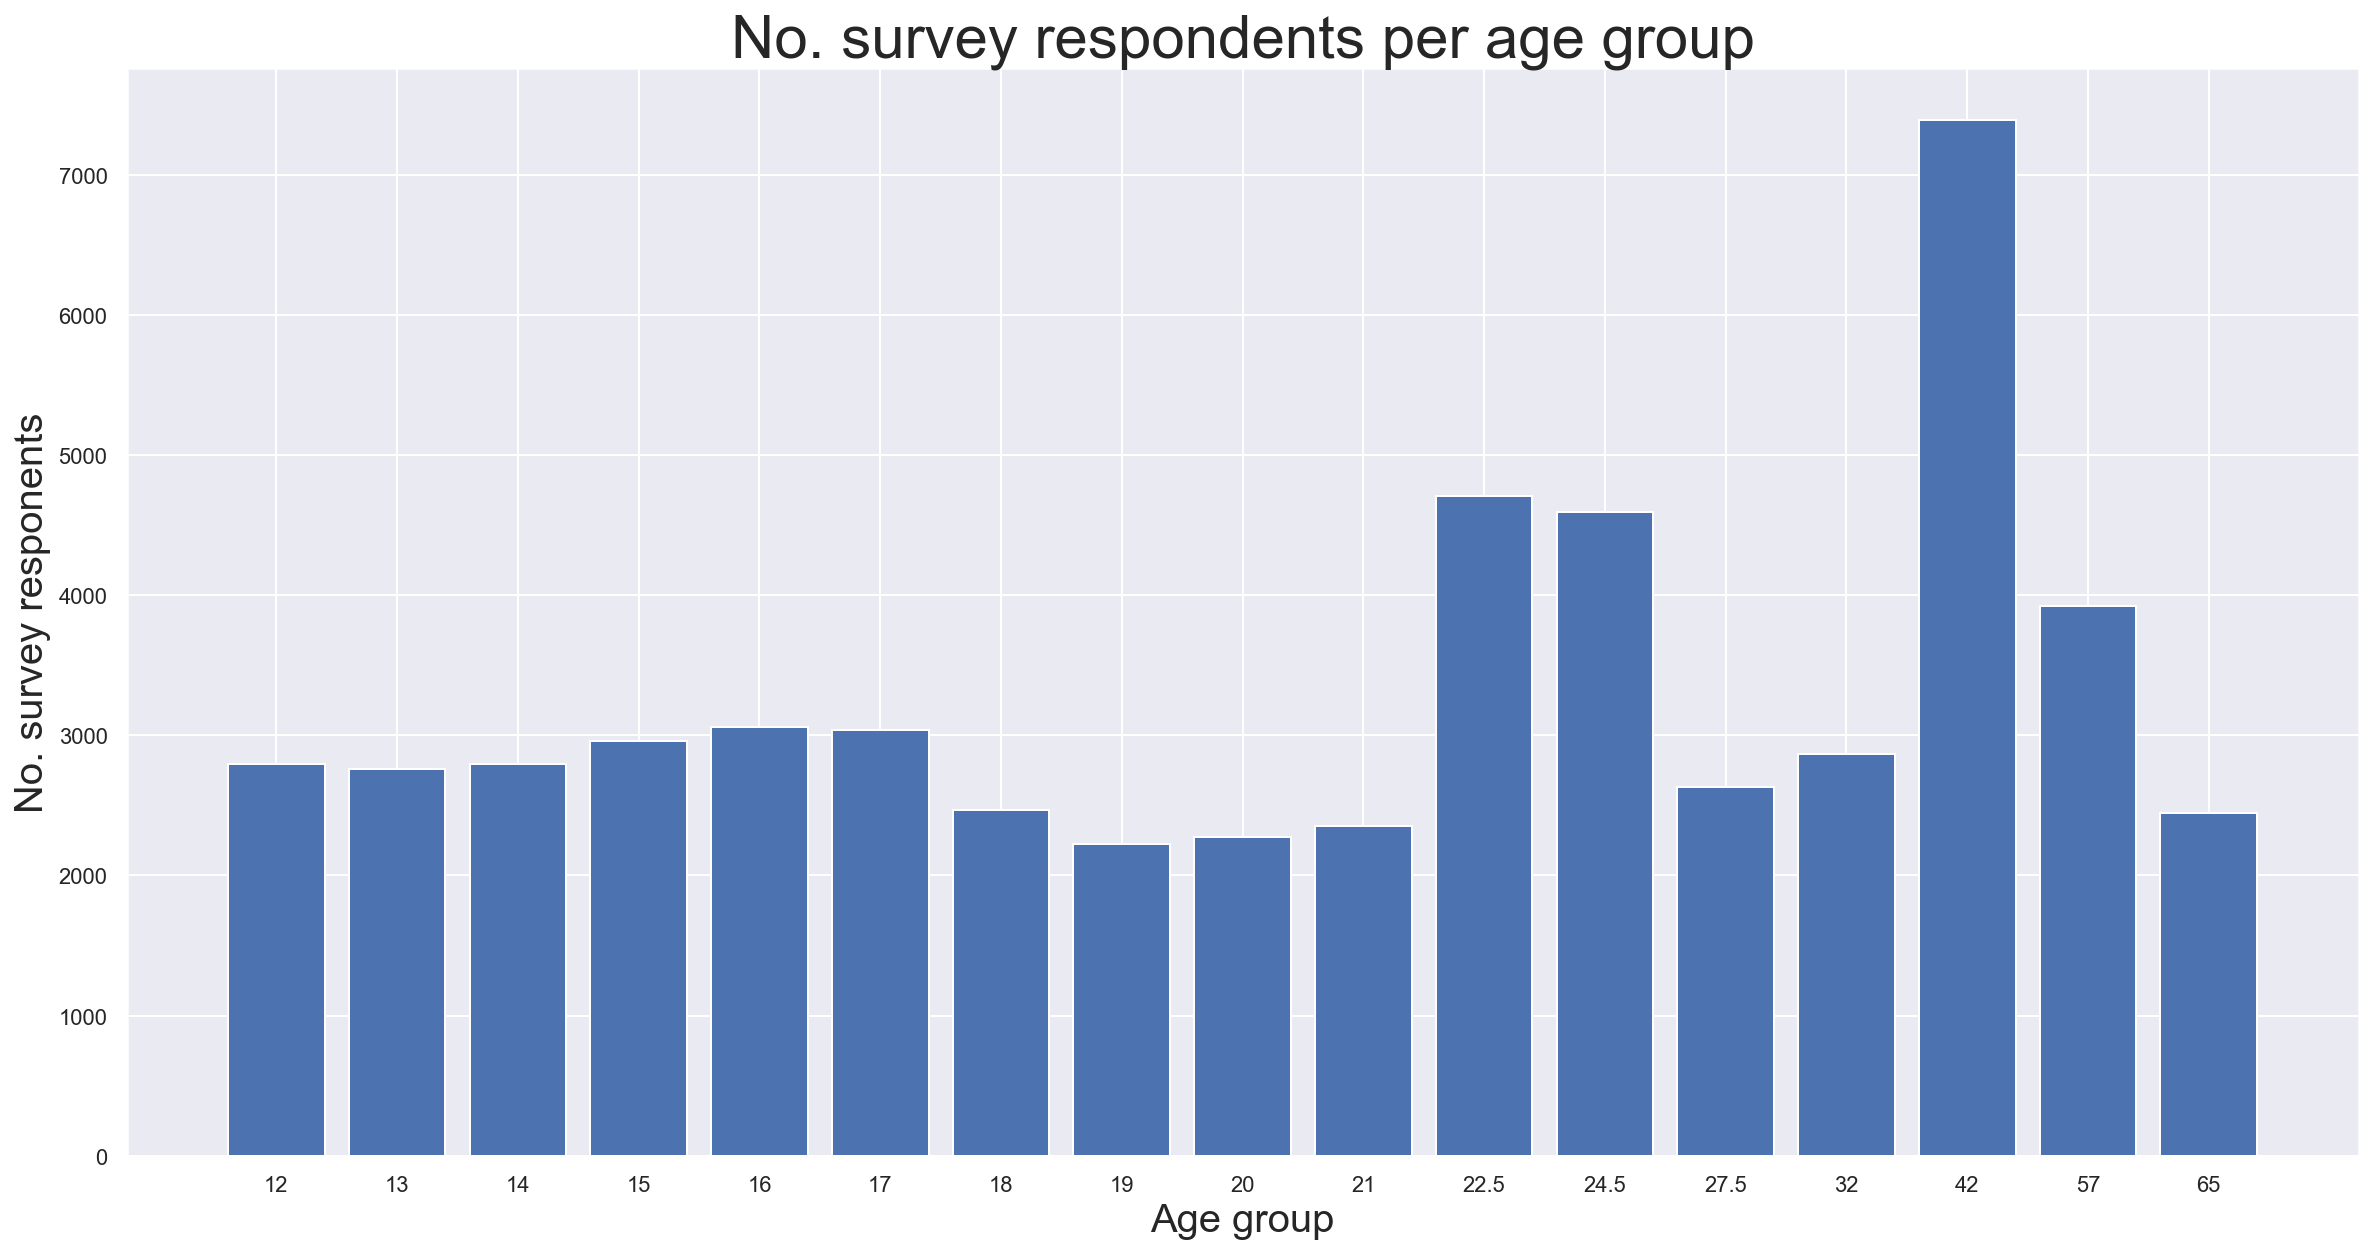

In [36]:
# getting age group labels as strs
drugs_age_strs = drugs['age'].astype(str)
drugs_age_strs = [age.replace('.0','') for age in drugs_age_strs]

fig, ax = plt.subplots(figsize=(20,10))
plt.bar(drugs_age_strs,drugs['n'])
plt.title("No. survey respondents per age group", fontdict={'fontsize':30})
plt.xlabel("Age group", fontdict={'fontsize':20})
plt.ylabel("No. survey responents", fontdict={'fontsize':20})
plt.show()

The above histogram visualizes the number of survery respondents per age group. I have created this to check whether any age groups have too few responents to provide reliable data. This does not appear to be the case. Whilst the bin labelled '42' appears to have far more respondents than any other bin, this is not particularly concerning as it actually refers to respondents in one of the largest age ranges in the dataset (35-49).

In [37]:
# getting lists of the use and frequency column names 
use_cols = [col for col in drugs.columns if 'use' in col]
freq_cols = [col for col in drugs.columns if 'frequency' in col]

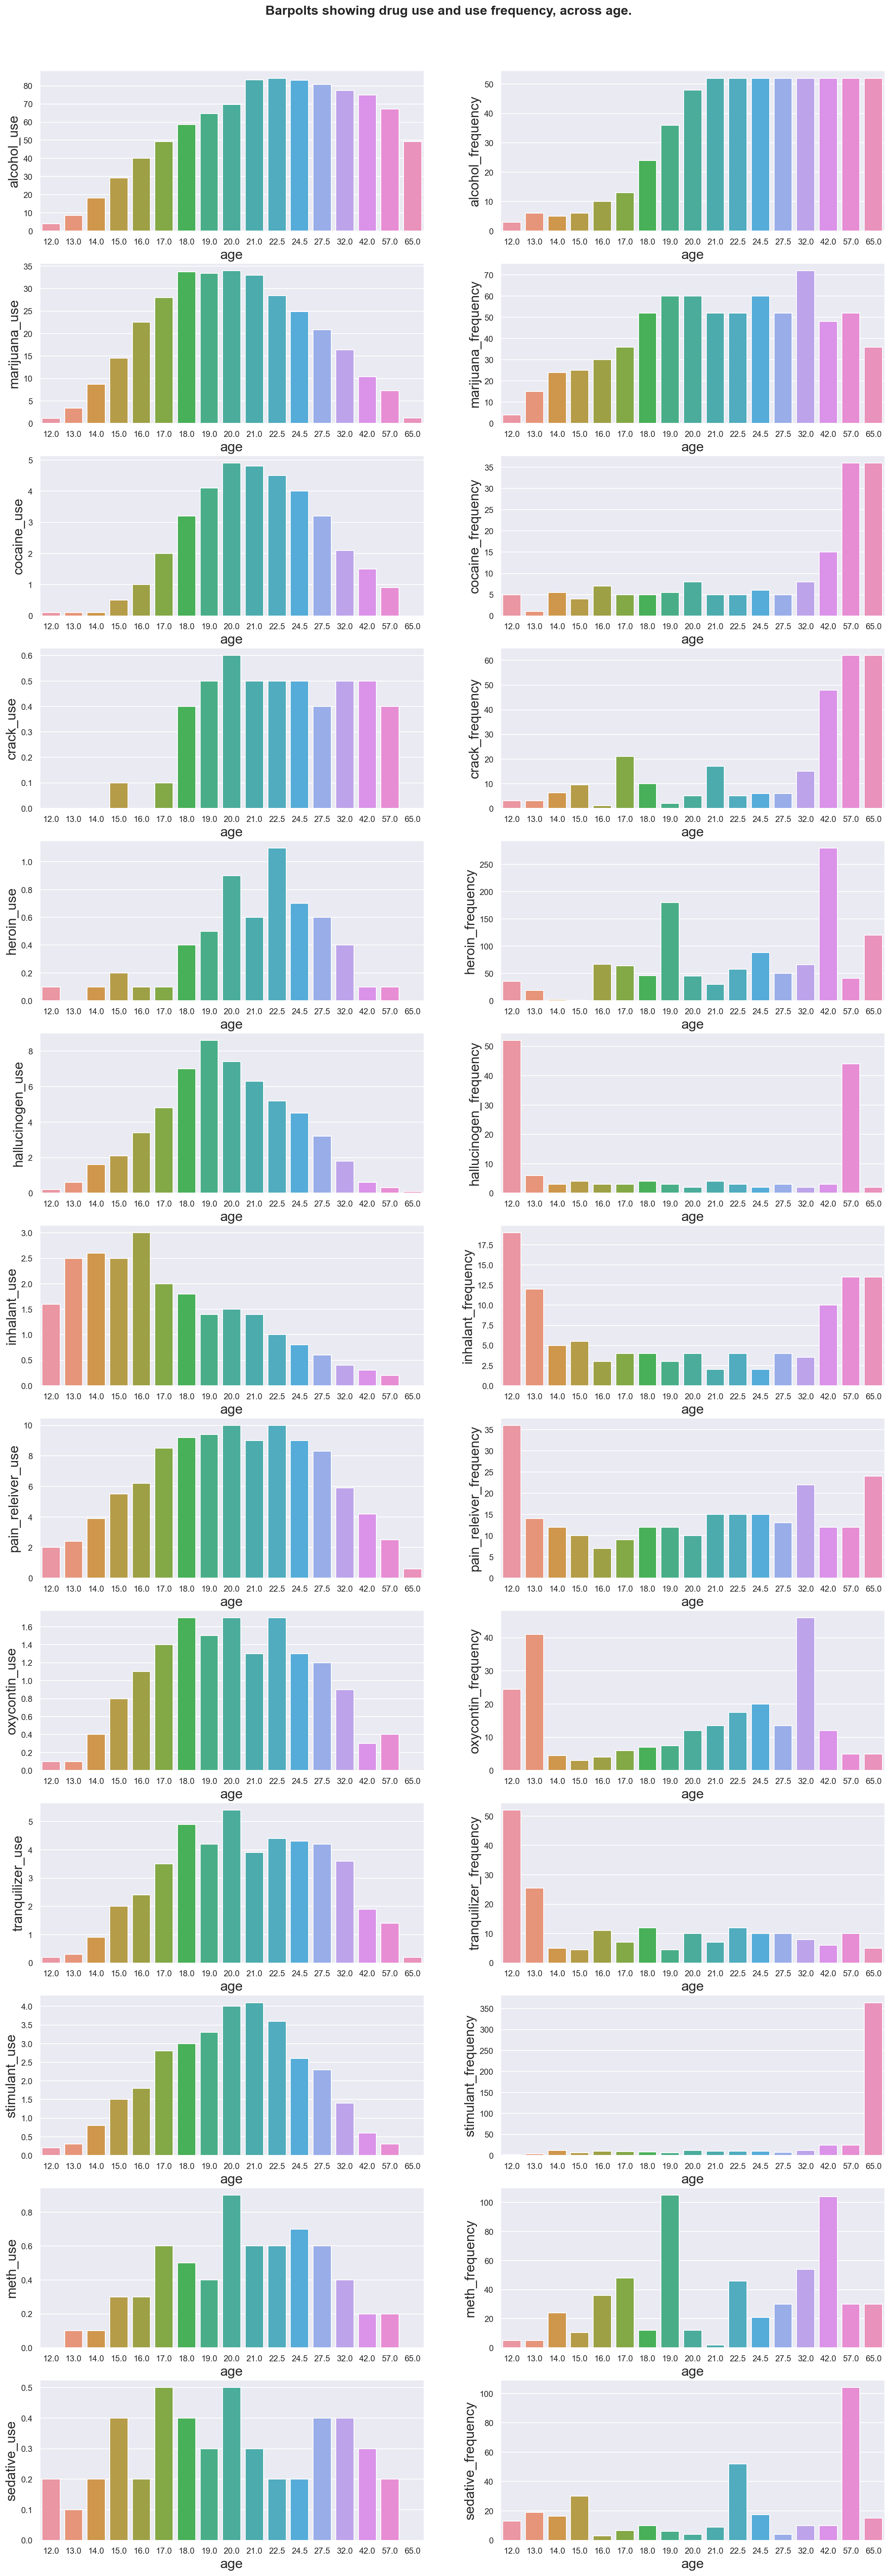

In [38]:
# setting label sizes
sns.set(rc = {'axes.labelsize' : 18 })

fig, ax = plt.subplots(13,2,figsize=(20,60))

# setting fig title
fig.suptitle("Barpolts showing drug use and use frequency, across age." ,
             fontsize = 'x-large', 
             fontweight = 'bold',
             y=.9);

# generating histograms
plot_row = 0
plot_col = 0
for col in range(len(use_cols)):
    sns.barplot(drugs['age'],drugs[use_cols[col]],ax=ax[plot_row, plot_col])
    plot_col +=1
    sns.barplot(drugs['age'],drugs[freq_cols[col]],ax=ax[plot_row, plot_col])
    plot_col = 0
    plot_row += 1

 The above plots are histograms of the various drug’s use and frequency columns. They help to provide a clear overveiw of how each drug’s usage changes across the age groups. For each drug, we can see the following:
 * The percentage of respondents in each age group who drink alcohol steadily increases until the age range 22-23, at which point it gradually begins to decline. Whilst greater proportions of people over 22-23 consume alcohol and those younger than 22-23, the data are roughly normally distributed (with the right tail truncated by the 65+ bin). The overall use of alcohol is much greater than any other drug type. The frequency with which alcohol is consumed steadyly increases until age 21. There after, a frequency of 52 is recorded for all age groups. This suggests that the measure used for this data was the number of weeks in a year where the respondent consumed alcohol.
 * The percentage of respondents in each age group who consume marijuana is normally distributed, centred on the late teens to early 20s. After alcohol, marijuana is the second most consumed drug over all. Although the frequency of use steadily increased up to age 19, after this, there is not a clear pattern in marijuana frequency.
 * Cocaine use is normally distributed, centred around age 20. The distribution is narrower than those for marijuana and alcohol use, with extremely few users before the age of 15, or beyond the age of 65. The frequency of cocaine use is similar across most ages, with the exception of the two eldest age brackets. These values may be accounted for by the smaller numbers of users at this age. Those who still consume cocaine at this age may also be those who are most likely to consume at a higher frequency.
 * Crack is used by very few respondents (<0.6%) in any age group and not at all by several of the younger groups and the eldest age group. The frequency of crack use shows a similar trend to that for cocaine use.
 * Heroin use is roughly normally distributed, but as very few respondents do use it, there may not be enough data to see this trend clearly. After meth, it is overall the 2nd least commonly used drug. No clear trend is apparent in the frequency of heroin use.
 * Hallucinogen use is normally distributed, with the 19 y/o age group having the greatest number of consumers. Overall, it is the 4th most commonly consumed drug amongst all age groups. Whilst the frequency of hallucinogen initially appears as if it might have a bimodal distribution, this is likely not the case. Rather, the high frequency values at either end of the histogram are likely being skewed by some extreme recordings in very small bin (in terms of number of users). Otherwise, the frequency of Hallucinogen use appears to be roughly similar across all age groups.
 * Inhalant use is increases up to age 16, after which it steadily declines. Over all, Inhalants appear to be most commonly used by the survey’s younger respondents. The frequency of inhalant use appears to have a bimonal distribution, with the most frequent use amongst the youngest and eldest respondents.
 * Pain reliever use is normally distributed and centred around the early 20’s. Pain relievers are the 3rd most commonly used drug. The frequency of pain reliever use is similar across most age groups, with a moderate increast amongst the youngest and eldest groups.
 * Tranquilizer use has a roughly normally distribution, centred around the 20 y/o age group. The freqency of use appears to be most common amongst the 12 y/o age group, but this may be unreliable due to the small number of users in this age group.
 * Stimulant use is normally distrbuted, centred around the age 21. The stimulant frequency histogram is difficult to read as the sole respondent in the 65+ group appears to have said that they use stimulants everyday. As such, the scale of the graph makes a comparison of the other age groups difficult.
 * As with heroin, meth use is roughly normally distributed, but there may not be enough data to see this trend clearly. There is no clear pattern in the frequency of meth use.
 * As with heroin and meth, sedative use may be approaching a normal distribution, but there are too few users in the data to make this clear. No pattern can be seen in the frequency of meth use.

Overall, the % of participants using a particular drug across the age groups is normal or near-normal for several of the drug types. However, for some, there is too little data to observe a clear pattern. The frequency data for several drugs is also somewhat unreliable as, for these drugs, it appears that few users may be contributing some extreme values. 
 

In [39]:
# getting x tick names
xtick_labels = []
for drug in use_cols:
    xtick_labels.append(drug[:-4].title().replace("_"," "))

In [40]:
# creating z-scaled version of the dataset
drugs_zscaled = pd.DataFrame(stats.zscore(drugs[drugs.columns[2:]]), columns = drugs.columns[2:])
drugs_zscaled['age'] = drugs['age']
drugs_zscaled['n'] = drugs['n']
drugs_zscaled.set_index('age', inplace = True)

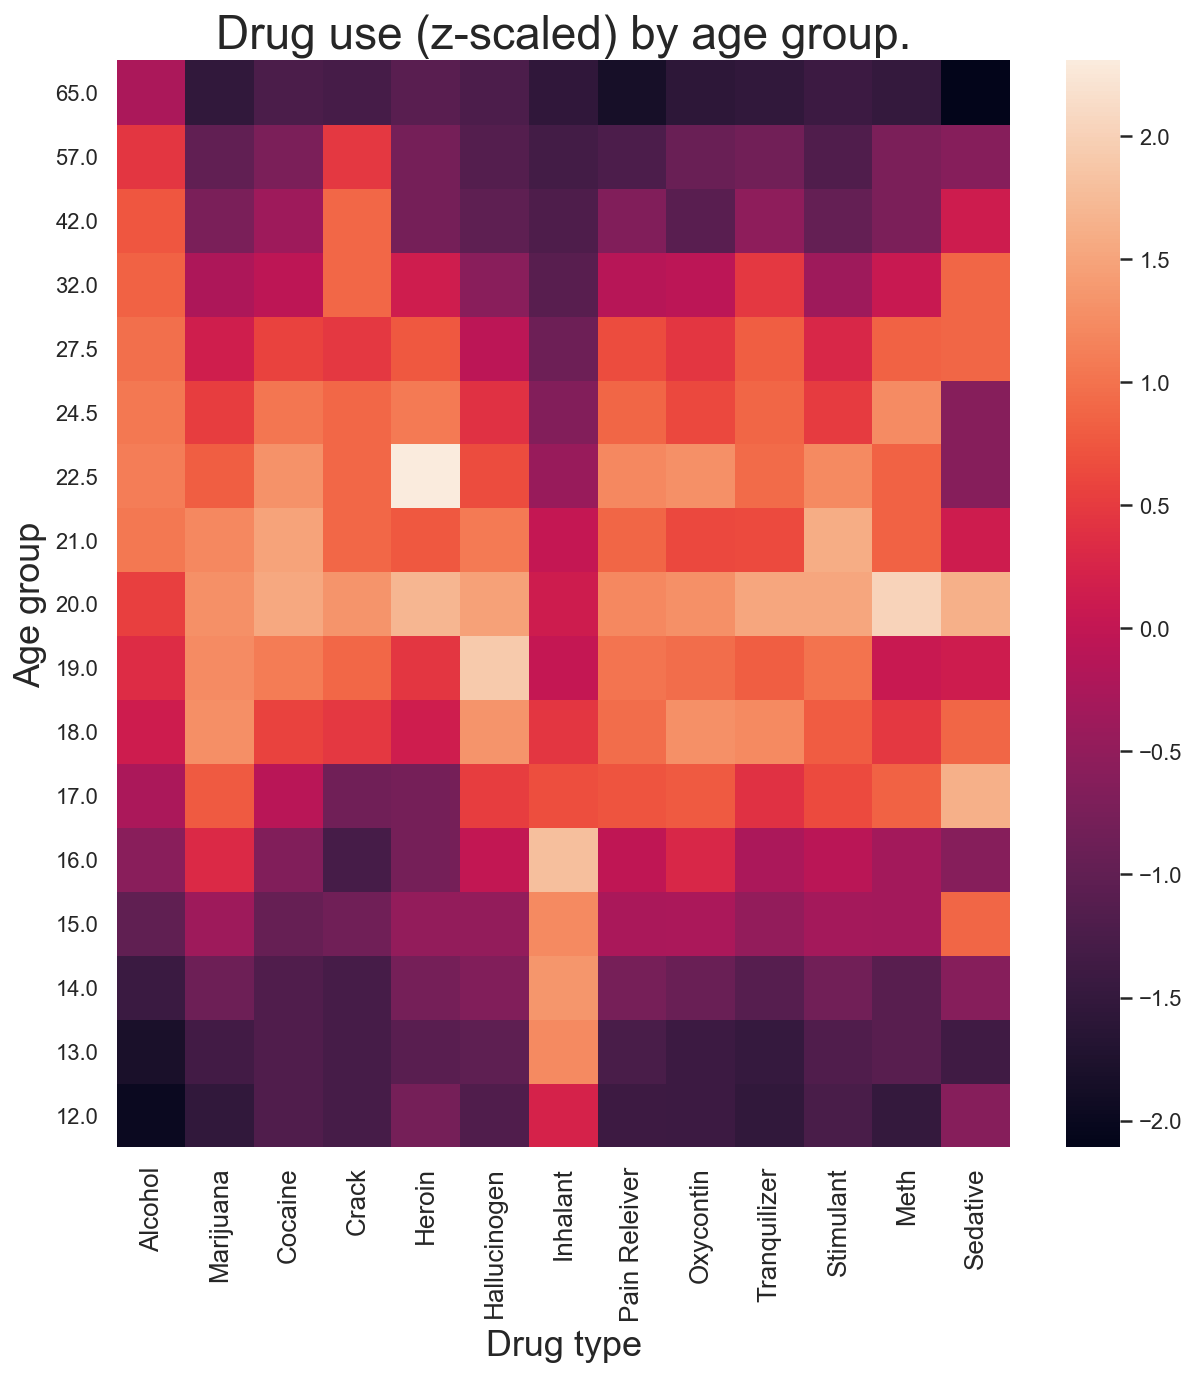

In [41]:
# plotting a heatmap of z-scaled use by agegroup
use_by_age = drugs_zscaled[use_cols]

fig, ax = plt.subplots(figsize=[10,10])
sns.heatmap(use_by_age)
plt.gca().invert_yaxis()

plt.title("Drug use (z-scaled) by age group.", fontsize=23);
plt.xlabel("Drug type", fontsize=18);
plt.xticks(ticks=[el+.5 for el in range(len(xtick_labels))], labels=xtick_labels, fontsize=13);
plt.ylabel("Age group", fontsize=18);
plt.yticks(rotation=0);

The above heatmap plots drug use against age group. I've created it to compare drug use over age between drugs. As alochol use is far more common than other drugs, the values are z-scaled (within each drug category) to make the plot more legible. As above, useage exhibits a normal distribution centred around a particular age group for many drugs (see: alchohol, marijuana, cocaine, stimulants). 

Inhlant use stands out for it's far greater amongst younger than older people. It is also far more commonly used by younger people than other drugs.

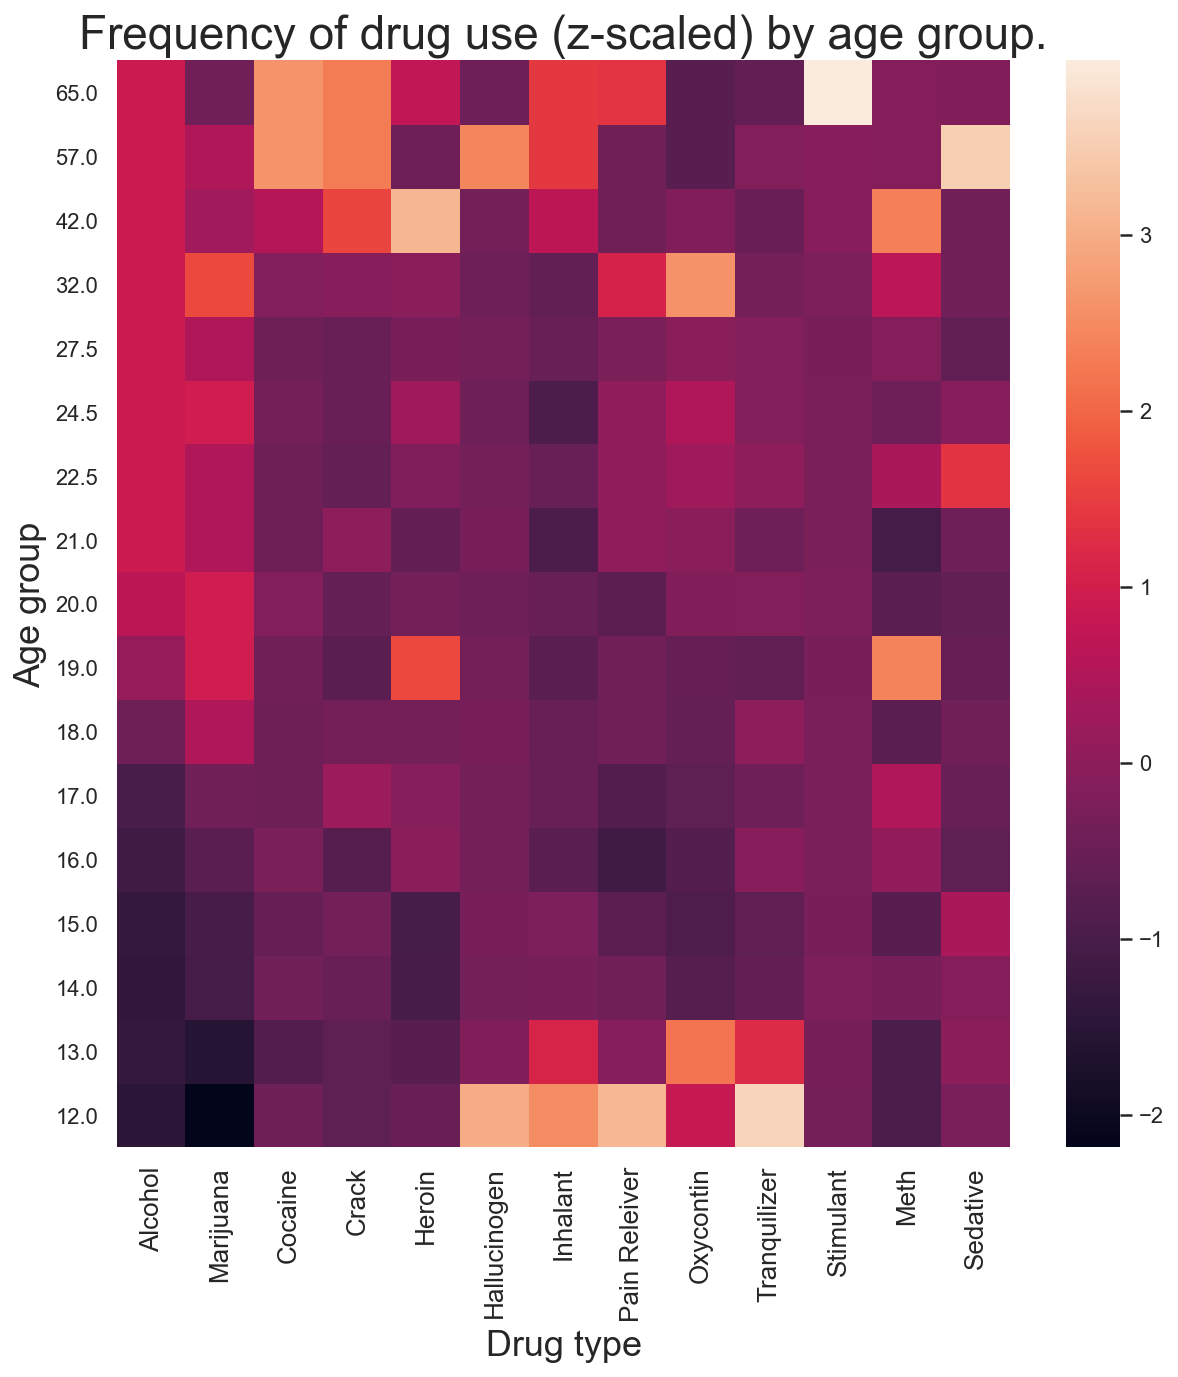

In [42]:
# plotting a heatmap of z-scaled frequency by agegroup
fig, ax = plt.subplots(figsize=[10,10])
freq_by_age = drugs_zscaled[freq_cols]
sns.heatmap(freq_by_age)
plt.gca().invert_yaxis()

plt.title("Frequency of drug use (z-scaled) by age group.", fontsize=23);
plt.xlabel("Drug type", fontsize=18);
plt.xticks(ticks=[el+.5 for el in range(len(xtick_labels))], labels=xtick_labels, fontsize=13);
plt.ylabel("Age group", fontsize=18);
plt.yticks(rotation=0);

Similarly to the above, this heat map was created to allow easier comparison of use frequency between the various drugs across age groups. Visualised like this, the two clearest trends are the increasing frequency of use with age of both alcohol and marjiuana. Although there are some other clear hotspots, their reliability is questionable, for the reasons discussed in beneath the histograms above.

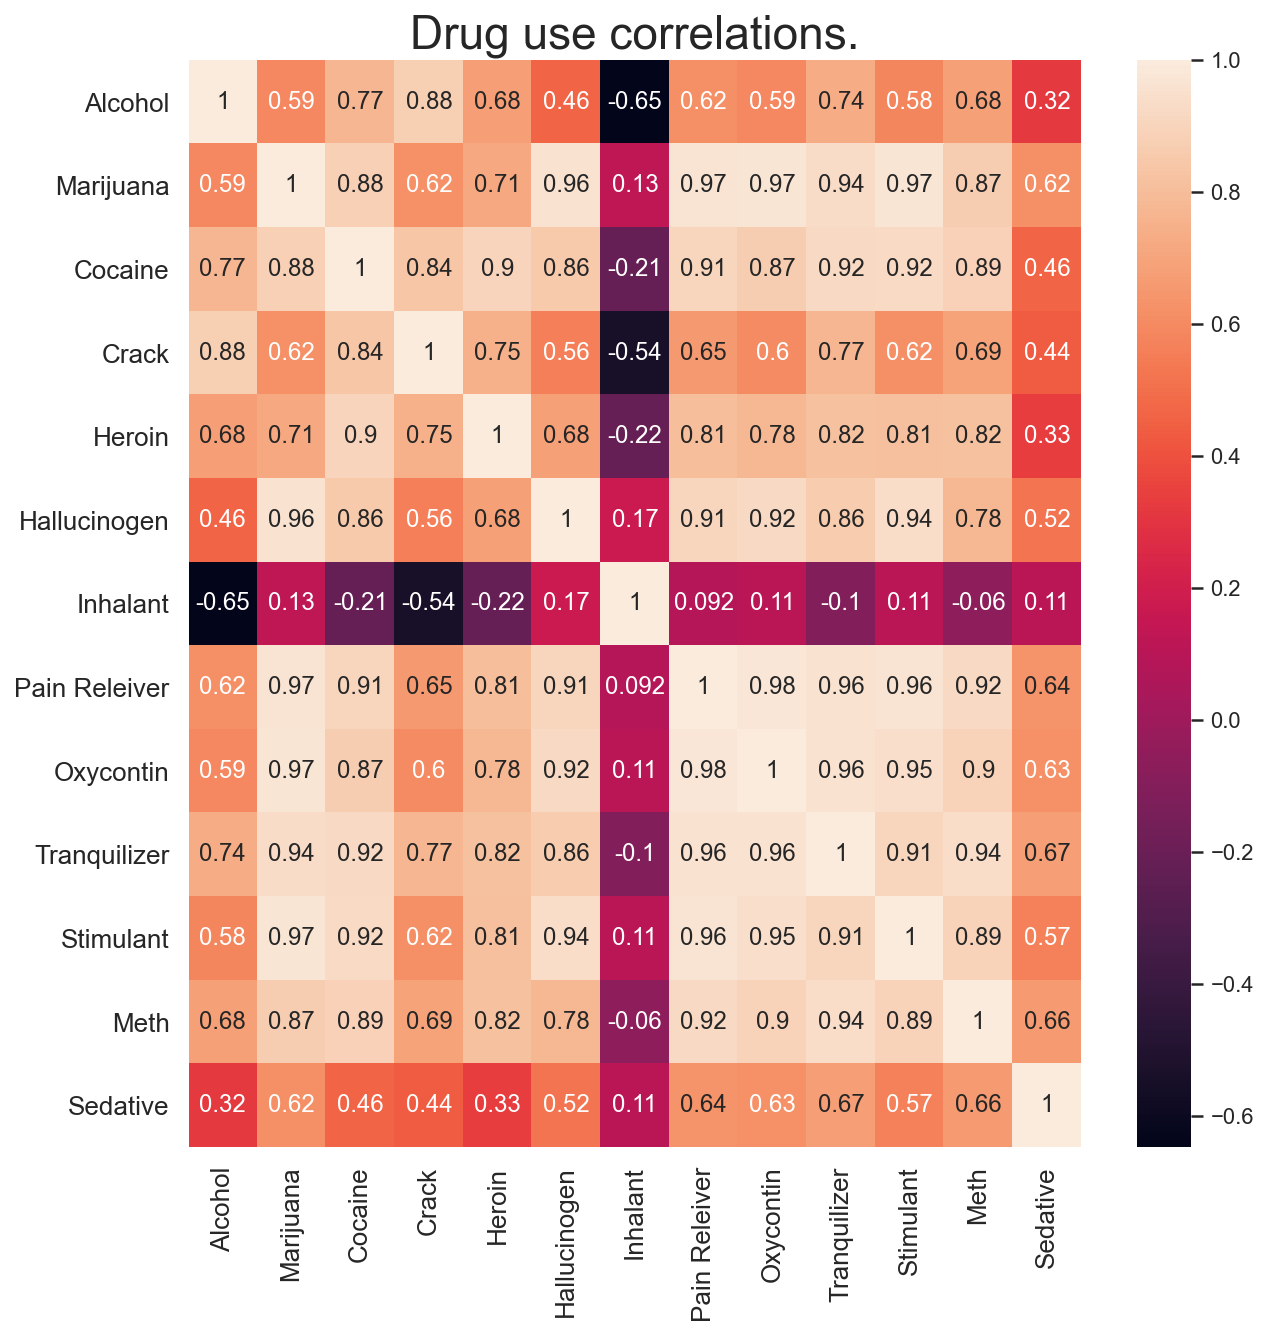

In [43]:
fig, ax = plt.subplots(figsize=[10,10])
sns.heatmap(drugs[use_cols].corr(),annot=True)
plt.title("Drug use correlations.", fontsize=23);
plt.xticks(ticks=[el+.5 for el in range(len(xtick_labels))], labels=xtick_labels, fontsize=13);
plt.yticks(ticks=[el+.5 for el in range(len(xtick_labels))], labels=xtick_labels, fontsize=13);

The above heatmap visualises the correlations amongst drugs by the porportion of respondents who use them at various ages. The most immediately apparent tend is that while most drugs are to some extent positively correlated with one another, inhalants use is negatively correlated with all other drugs. Another notable trend is the strong positive correlations amongst pain releivers, oxycontin, tranquilizers, stimulants and meth. Crack, meth and heroin use are more weakly correlated with other drugs, which is likely due to their lower overall use. 

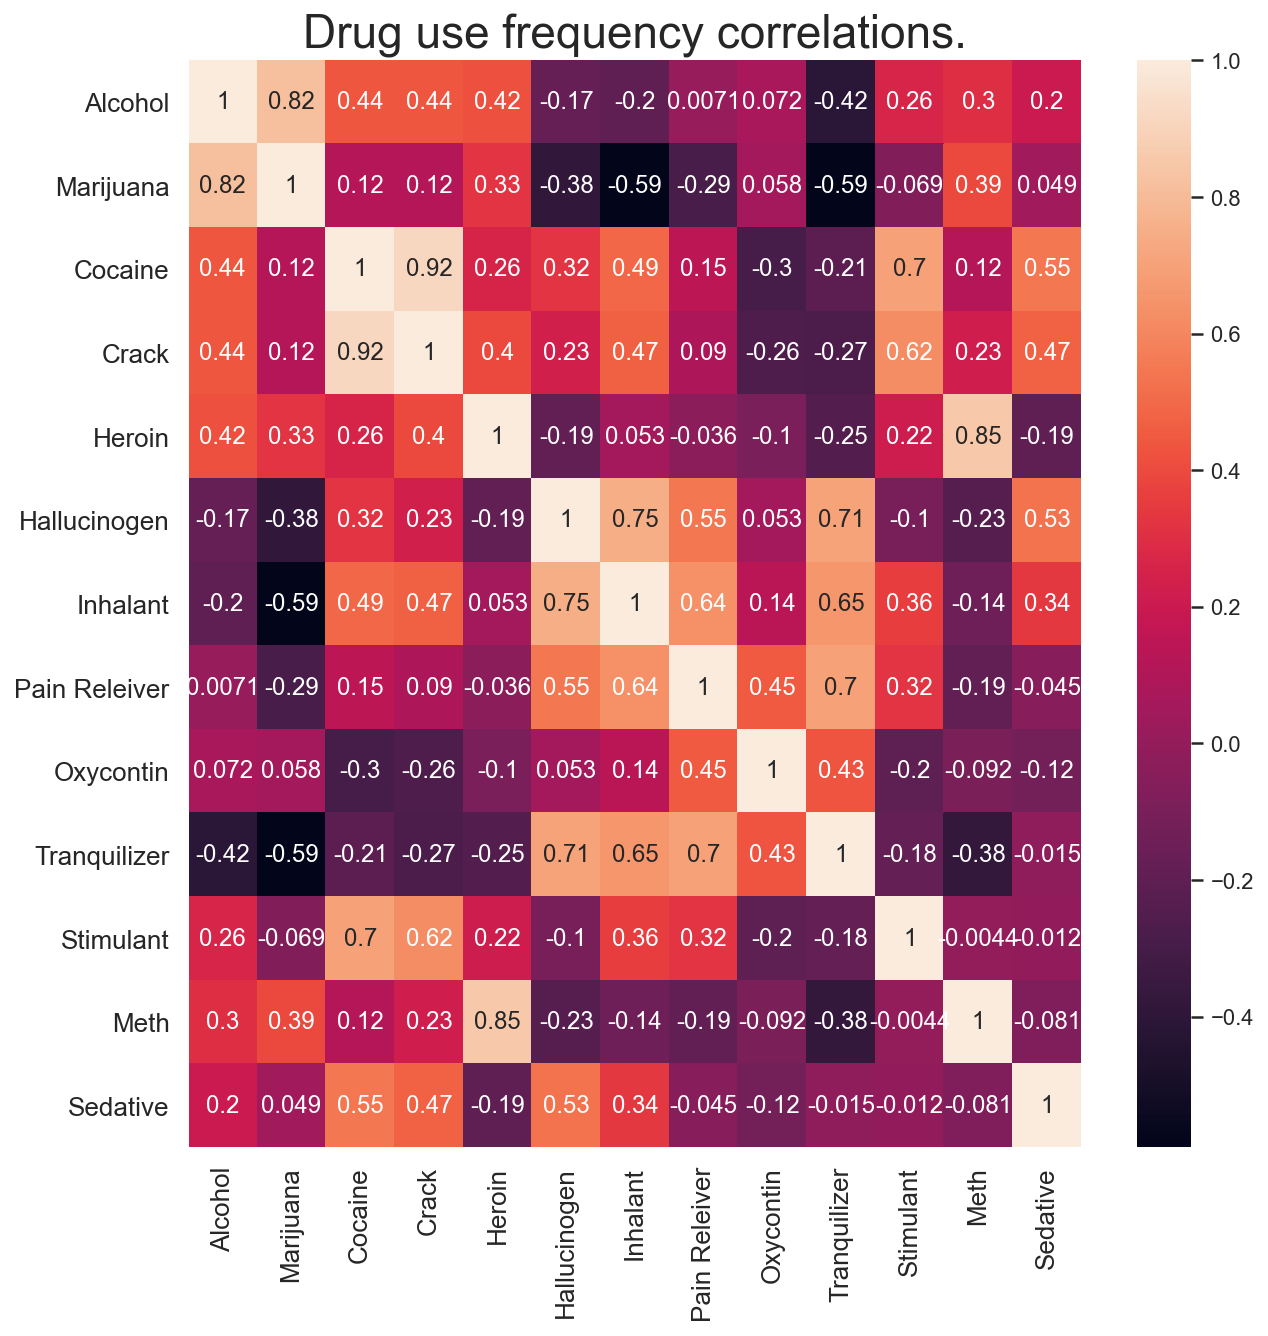

In [44]:
fig, ax = plt.subplots(figsize=[10,10])
sns.heatmap(drugs[freq_cols].corr(), annot = True)
plt.title("Drug use frequency correlations.", fontsize=23);
plt.xticks(ticks=[el+.5 for el in range(len(xtick_labels))], labels=xtick_labels, fontsize=13);
plt.yticks(ticks=[el+.5 for el in range(len(xtick_labels))], labels=xtick_labels, fontsize=13);

This heatmap visualises the correlations amongst drugs by their frequeny of use across the various age groups. Given my reservations about the frequency data discussed above, I am hestitant to draw any conclusions from this plot, but have included it for completeness.

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**

**A:** Write a specific question you would like to answer with the data (that can be accomplished with EDA).

**Q:** One stand out property of the data is the high use of inhalants amongst younger people relative to other drugs and other age groups. This is likely becuase inhalants are the class of drug that is most easily accessible to younger people (e.g. sniffing glue). Given this, I am interested to look into what happens at the point when respondents become legally able to drink are thus gain easy access to another drug. Specifically, I will investigate the relationship between drinking age and drug use in young adults (those ages 18-25). I hope to see which (if any) drugs see a decline in usage amongst young adults at the point they become legally able to drink.

**Q:** Write a description of the "deliverables": what will you report after testing/examining your hypothesis?

**A:** I will report the usage of all of the drugs in the data set, comparing two sets of two groups. The first of these will be young adults under the legal drinking age (i.e. those aged 18-20) against young adults over the drinking age (i.e. those aged 21-25). I will also report a similar comparison between those aged 20 and 21, to see whether there are more immediately apparent changes associted with drinking age. For each of these comparisons, I will report how the usage proportion of each drug changed, and which 3 drugs saw the greatest overall reduction in use.

-

**Q:** Use EDA techniques of your choice, numeric and/or visual, to look into your question.

**Report**



...

In [45]:
# constraining data set to young adults (18-25)
drugs['young_adult'] = [True if val >=18 and val <= 25 else False for val in drugs['age']]
drugs_ya = drugs[drugs['young_adult']==True]
# creating new feature indicating whether the age group can legally drink alcohol
drugs_ya['under_21'] = ["18-20" if val < 20 else '21-25'for val in drugs_ya['age']]

#creating z-scaled version of drugs_ya
drugs_ya_zscaled = pd.DataFrame(stats.zscore(drugs_ya[drugs_ya.columns[2:-2]]),columns = drugs_ya.columns[2:-2])
drugs_ya_zscaled['age'] = list(drugs[drugs['young_adult']==True]['age'])
drugs_ya_zscaled.set_index('age', inplace = True)

<ipython-input-45-667f68de72af>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drugs_ya['under_21'] = ["18-20" if val < 20 else '21-25'for val in drugs_ya['age']]


In [46]:
# usage, 18-20 vs 21-25
drugs_ya.groupby('under_21')[use_cols].mean().T

under_21,18-20,21-25
alcohol_use,61.65,80.050
marijuana_use,33.55,30.075
cocaine_use,3.65,4.550
crack_use,0.45,0.525
heroin_use,0.45,0.825
hallucinogen_use,7.80,5.850
inhalant_use,1.60,1.175
pain_releiver_use,9.30,9.500
oxycontin_use,1.60,1.500
tranquilizer_use,4.55,4.500


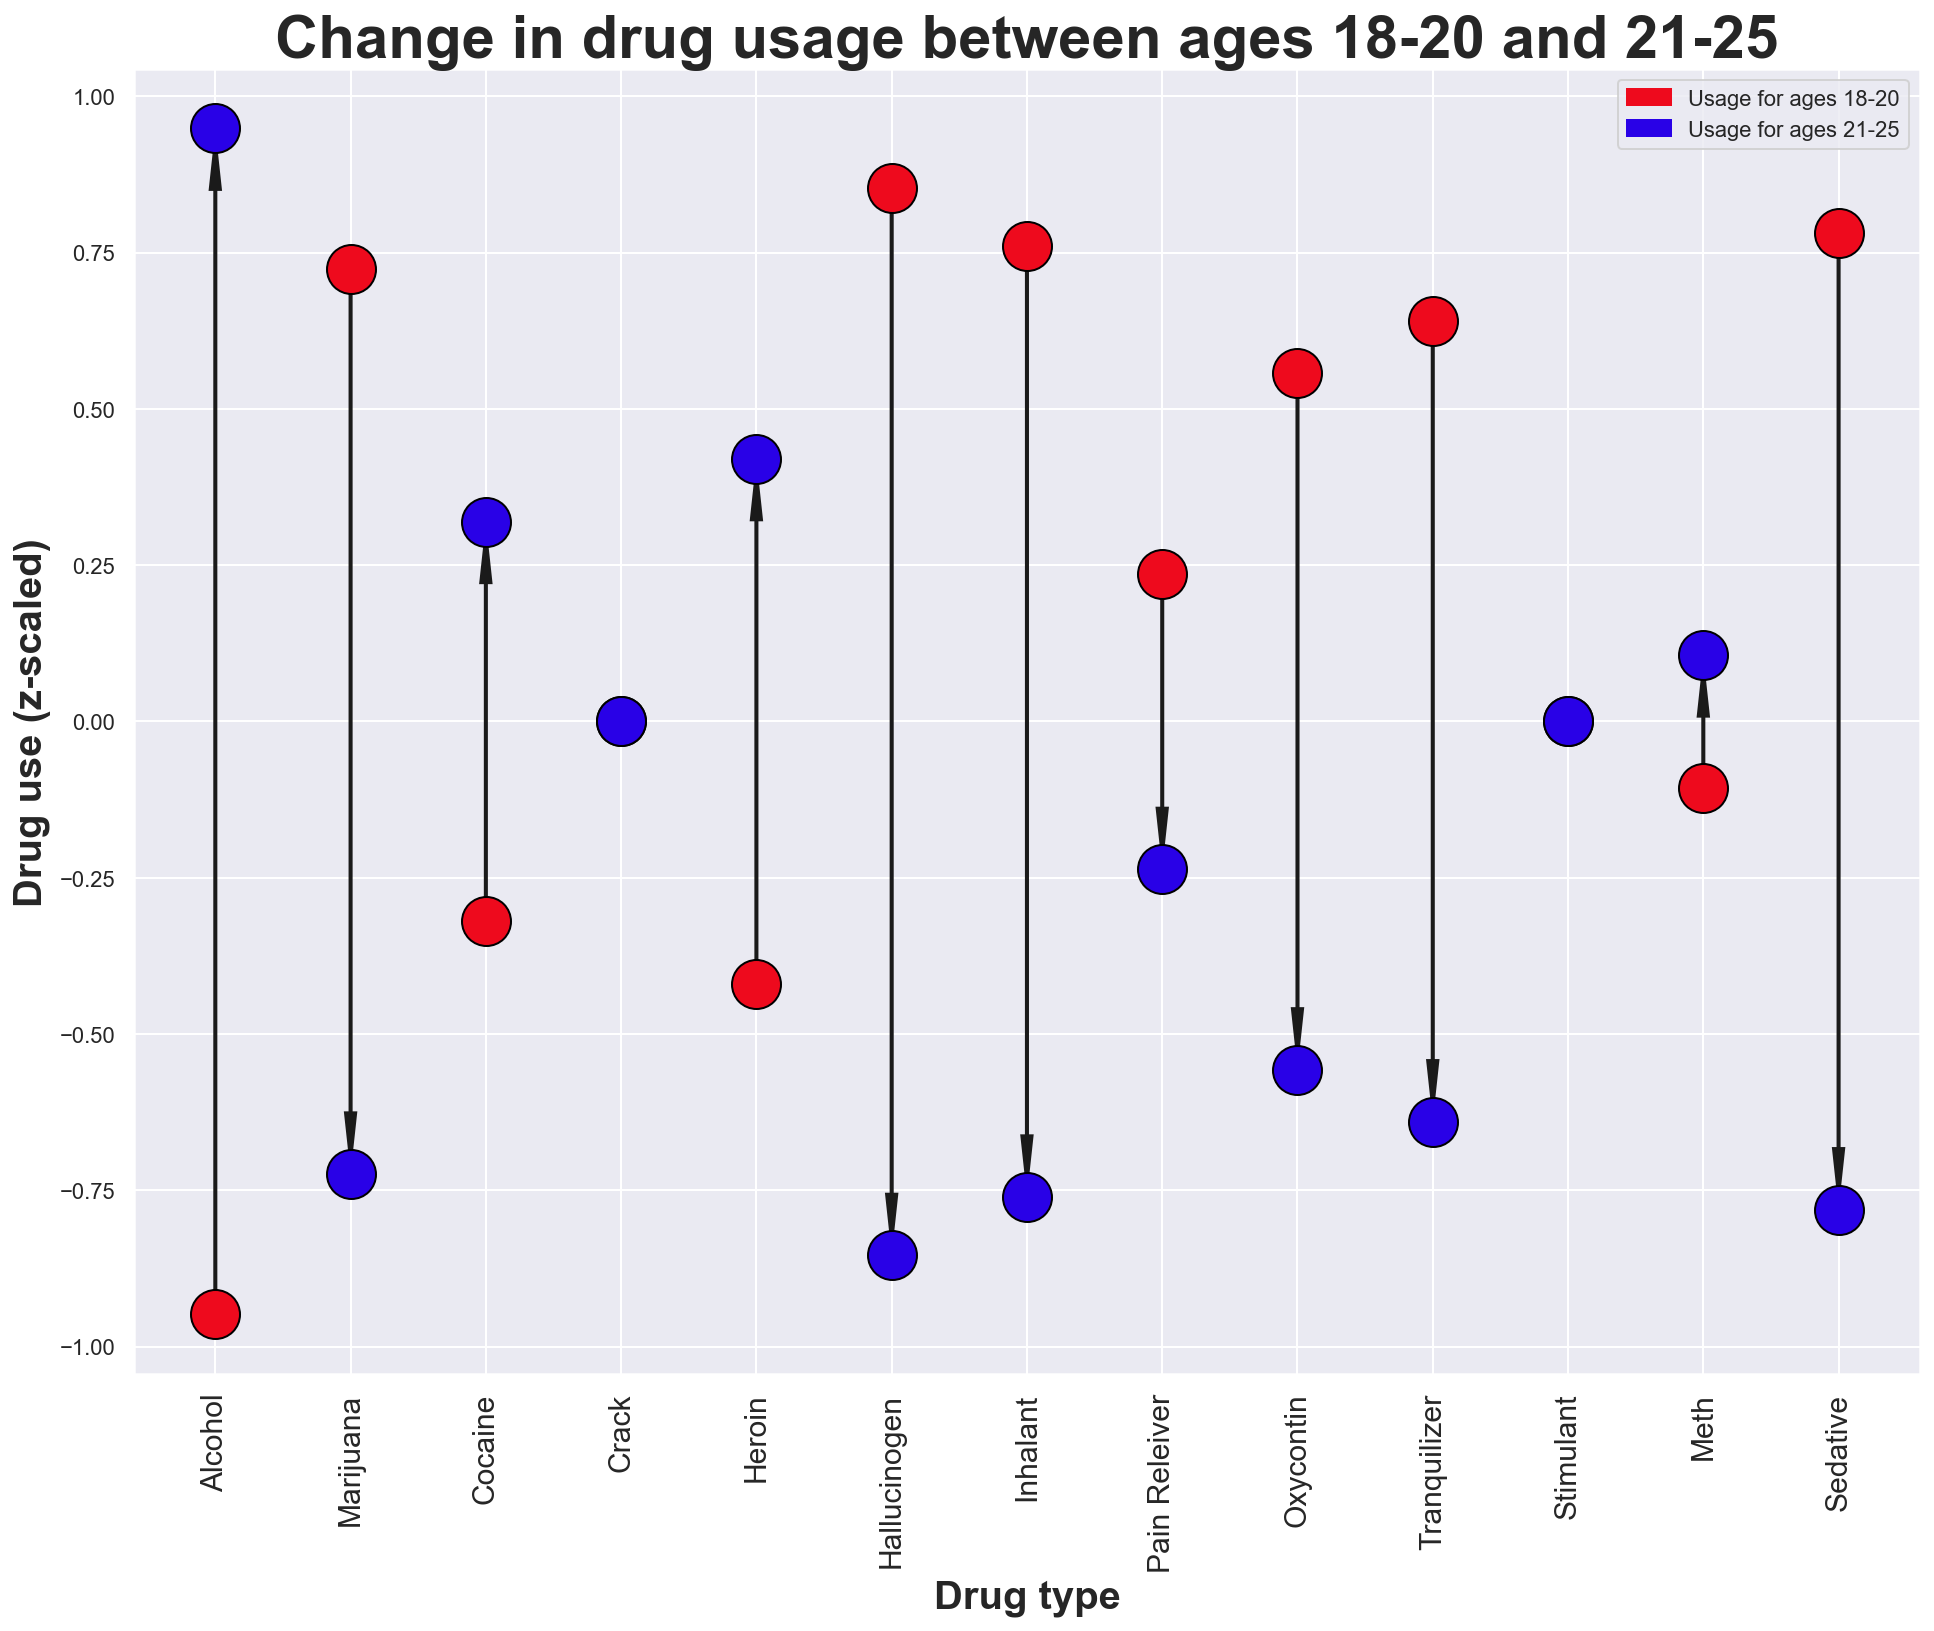

In [47]:
# barbell plot, usage, 18-20 vs 21-25

twenty_colour = '#EE0A1D'
twenty_one_colour = '#2901E7'
line_colour = '#000000'

fig, ax = plt.subplots(figsize=(16,12))
plt.ylabel('Drug use (z-scaled)', fontweight='bold', fontsize=20)
plt.xlabel('Drug type', fontweight='bold', fontsize=20)
plt.xticks(ticks=range(len(xtick_labels)),labels=xtick_labels,fontsize=15,rotation = 90)
plt.title("Change in drug usage between ages 18-20 and 21-25", fontweight='bold', fontsize=30)

patch1 = mpatches.Patch(color=twenty_colour, label='Usage for ages 18-20')
patch2 = mpatches.Patch(color=twenty_one_colour, label='Usage for ages 21-25')   

#add handles
handles, labels = plt.gca().get_legend_handles_labels()
handles.extend([patch1, patch2])

#add legend
plt.legend(handles=handles);

for drug in drugs[use_cols]:
    twenty = np.mean(drugs_ya_zscaled.loc[18.0:20.0][drug])
    twenty_one = np.mean(drugs_ya_zscaled.loc[21.0:24.5][drug])
    drug_df = [twenty,twenty_one]
    ax.scatter(drug, drug_df[0], c = twenty_colour, s = 600, zorder = 3, ec = line_colour)
    ax.scatter(drug, drug_df[1], c = twenty_one_colour, s = 600, zorder = 3, ec = line_colour)
    ax.arrow(drug,
             drug_df[0],
             0,
             drug_df[1]-drug_df[0],
             width=.03,
             facecolor='k',
             edgecolor='none',
             length_includes_head=True,
             head_width=0.1,
             head_length=0.1)



The above barbell plot shows the difference in mean use rate for all drugs between the ages 18-20 and 21-25. The values are z-scaled for easier comparison. The unscaled values are available in a dataframe below the previous cell.

 * The greatest overall change in drug use can be seen in alcohol, which increases by a large margin.
 * All other major changes in usage are declines in usage. Specifically, this can be seen for marijuana, hallucinogens, inhalants, oxtcontyin, tranquilizers and sedatives.
 * The 3 drugs to see the largest declines in usage are:
     1. Hallucinogens
     2. Sedatives
     3. Inhalants
 * For some drugs, the useage from 21+ increases, however these changes are small compared with those drugs who's usages decline. These are cocaine, heroin and meth.
 * Little change can be seen in crack and stimulant usage.

In [50]:
# usage, 18-20 vs 21-25
drugs_ya[drugs_ya['age']==20.0]# | drugs_ya['age']==21.0]#[use_cols].mean().T
use_cols.append('age')
drugs_ya.iloc[[2,3]][use_cols].T

,8,9
alcohol_use,69.7,83.2
marijuana_use,34.0,33.0
cocaine_use,4.9,4.8
crack_use,0.6,0.5
heroin_use,0.9,0.6
hallucinogen_use,7.4,6.3
inhalant_use,1.5,1.4
pain_releiver_use,10.0,9.0
oxycontin_use,1.7,1.3
tranquilizer_use,5.4,3.9


KeyError: 'age'

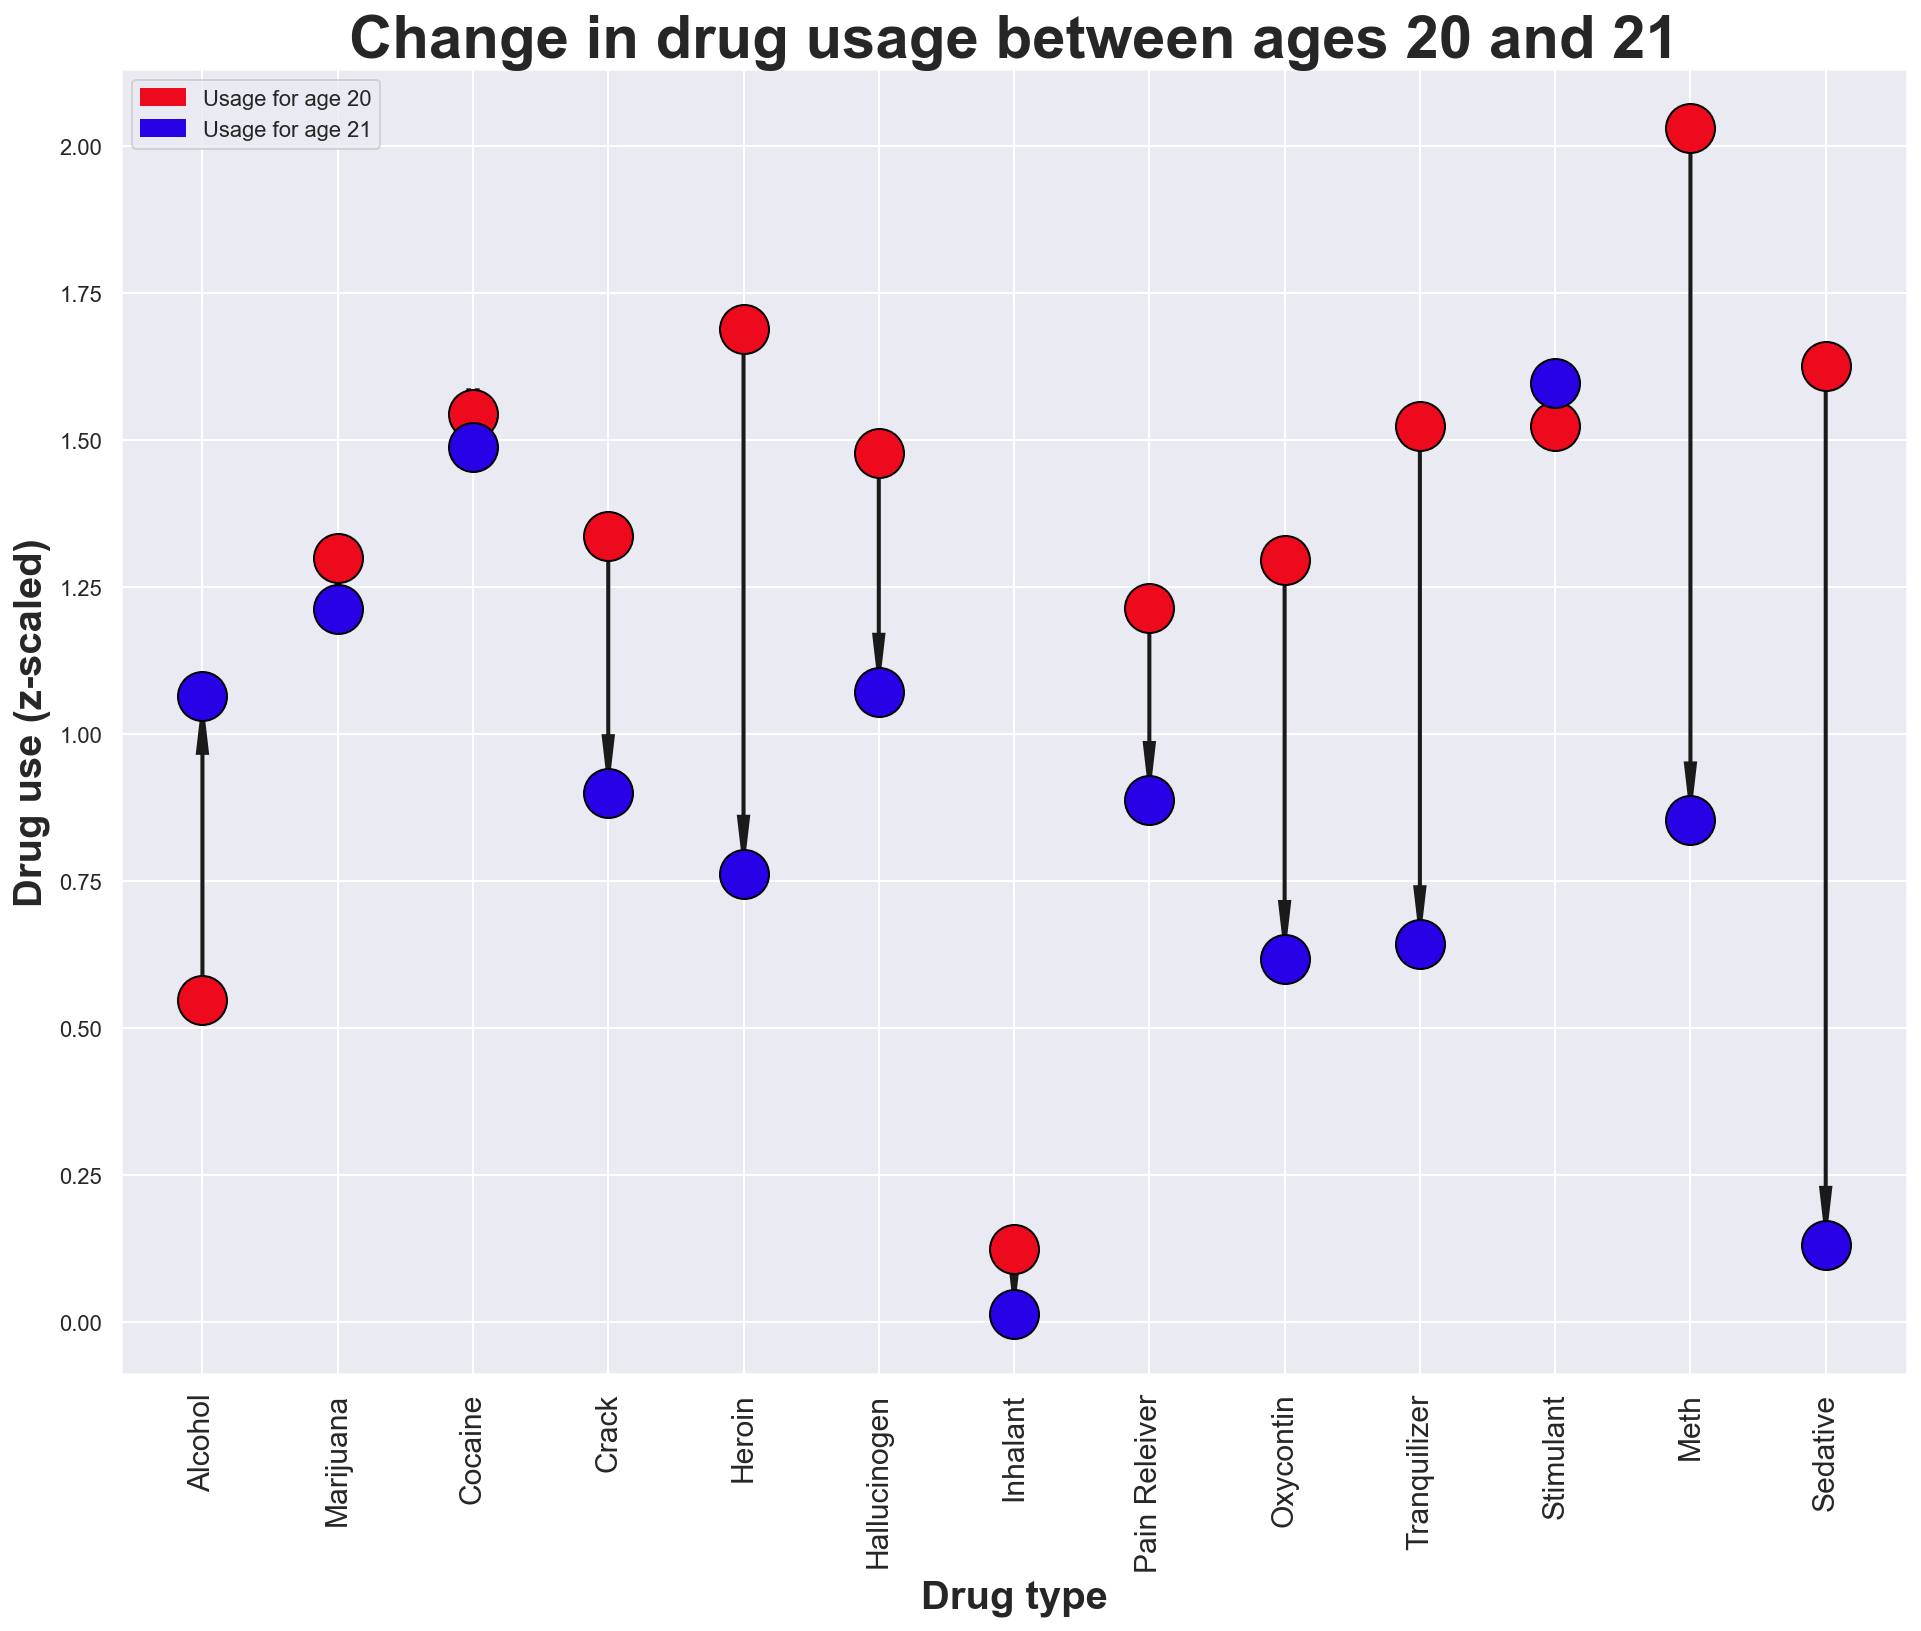

In [52]:
# barbell plot, usage, 20 vs 21

twenty_colour = '#EE0A1D'
twenty_one_colour = '#2901E7'
line_colour = '#000000'

fig, ax = plt.subplots(figsize=(16,12))
plt.ylabel('Drug use (z-scaled)', fontweight='bold', fontsize=20)
plt.xlabel('Drug type', fontweight='bold', fontsize=20)
plt.xticks(ticks=range(len(xtick_labels)),labels=xtick_labels,fontsize=15,rotation = 90)
plt.title("Change in drug usage between ages 20 and 21", fontweight='bold', fontsize=30)

patch1 = mpatches.Patch(color=twenty_colour, label='Usage for age 20')
patch2 = mpatches.Patch(color=twenty_one_colour, label='Usage for age 21')   

#add handles
handles, labels = plt.gca().get_legend_handles_labels()
handles.extend([patch1, patch2])

#add legend
plt.legend(handles=handles);

for drug in drugs[use_cols]:
    twenty = drugs_zscaled.loc[20.0][drug]
    twenty_one = drugs_zscaled.loc[21.0][drug]
    drug_df = [twenty,twenty_one]
    ax.scatter(drug, drug_df[0], c = twenty_colour, s = 600, zorder = 3, ec = line_colour)
    ax.scatter(drug, drug_df[1], c = twenty_one_colour, s = 600, zorder = 3, ec = line_colour)
    ax.arrow(drug,
             drug_df[0],
             0,
             drug_df[1]-drug_df[0],
             width=.03,
             facecolor='k',
             edgecolor='none',
             length_includes_head=True,
             head_width=0.1,
             head_length=0.1)



The above barbell plot shows the difference in mean use rate for all drugs between the ages 20 and 21. The values are z-scaled for easier comparison. The unscaled values are available in a dataframe below the previous cell.

 * Similarly to the previous plot, we can see that alcohol use increases between ages 20 and 21, however not as much as it does overall for young adults either side of the drinking age.
 * More striking than the previous plot is that usage of all drugs with the exception of alcohol and stimulants decreases between the ages of 20 and 21.
 * The three drugs to see the greatest decline in useage after the legal drinking age are:
     1. Sedatives
     2. Meth
     3. Heroin.

In [ ]:
# frequency, under 20 vs 21
drugs.set_index('age').loc[20.0:21.0][freq_cols].T

**Q:** Write up your report on what you have found regarding the hypothesis about the data you came up with.

**A:** 

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

In [ ]:
sat.rate

In [ ]:
sat.boxplot(column = 'rate');

There are no outliers, where outliers are defined as values < IQR * 1.5 or > IQR * 1.5 

In [ ]:
sat_std = sat.rate.describe().loc['std']
sat_mean = sat.rate.describe().loc['mean']

for val in sat.rate:
    if val > (sat_mean + (sat_std*3)):
        print(val)
    elif val < (sat_mean - (sat_std*3)):
        print(val)

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and Spearman rank correlation

---

### 9.1 Calculate the Spearman correlation of sat `Verbal` and `Math`

1. How does the Spearman correlation compare to the Pearson correlation? 
2. Describe clearly in words the process of calculating the Spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [ ]:
sat[['verbal','math']].corr()

In [ ]:
sat[['verbal','math']].corr(method='spearman')

**Q:** How does the Spearman correlation compare to the Pearson correlation?

**A:**
    
**Q:** Describe clearly in words the process of calculating the Spearman rank correlation.

**A:**

### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the Spearman rank correlation?

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of converting raw scores to percentile.